# Heart Failure Prediction Analysis

#### Introduction
According to the World Health Organization, heart diseases lead to 12 million deaths annually worldwide. Developed countries, including the United States, account for half of these deaths. Early identification of cardiovascular diseases can help high-risk patients make lifestyle changes and reduce complications. This research aims to identify the most significant risk factors for heart disease and use logistic regression to predict overall risk.

In [174]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

### Read heart csv data 

### Data Preparation
#### Source
The dataset is publically available on the Kaggle website. The classification goal is to predict whether the heart patient has heart disease or not.The dataset provides the patients’ information. It includes over 981 records and 12 attributes.

In [175]:
# Load dataset
df = pd.read_csv(r'heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Data Attributes:
Each attribute is a potential risk factor. There are numerical, categorical and binary features.
1. Age : patient age in years
2. Sex  : M (male), F (female)
3. Cholestrol: serum cholesterol in mg/dl
4. FastingBS: fasting blood sugar > 120 mg/dl (1 = true; 0 =False)
5. RestingECG: Resting electrocardiographic results
6. OldPeak: ST depression induced by exercise relative to rest
7. ChestPainType: chest pain   types 
                  1: typical angina
                  2: atypical angina
                  3: non-anginal pain 
                  4: asymptomatic
8. MaxHR: maximum heart rate achieved
9. ExerciseAngina: exercise induced angina ( 1= yes, 0 = no )
10. ST_Slope: the slope of the peak exercise ST segment
11. RestingBp:resting blood pressure (in mm Hg on admission to the hospital)
12. HeartDisease: 1 = Heart   Disease 0 = No Heart Disease
 

### Exploratory Data Analysis

In [176]:
# shape of dataset
df.shape

(918, 12)

In [177]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [178]:
# check for duplicates
duplicates = df.duplicated()
duplicates.value_counts()

False    918
dtype: int64

In [179]:
# check for missing values 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [180]:
# classify the data to continuous, categorical and binary parameters
continuous_var = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categorical_var = ["ChestPainType", "RestingECG", "ST_Slope"]
binary_var = ["Sex", "FastingBS", "ExerciseAngina"]

In [181]:
# EDA of continuous variables
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


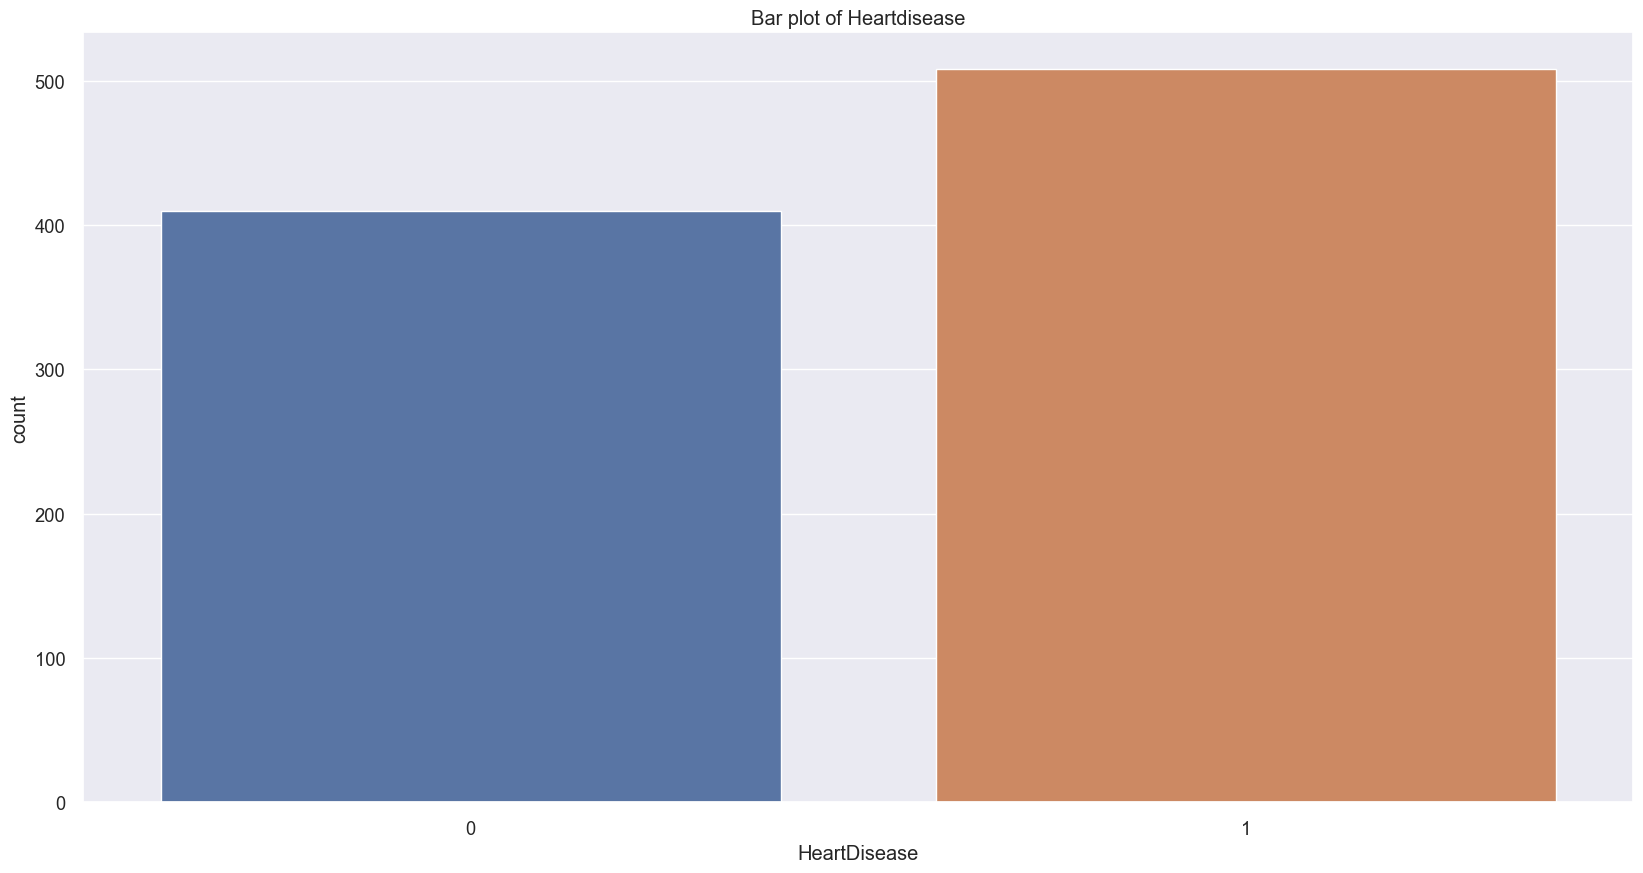

In [182]:
freq_table = df['HeartDisease'].value_counts(normalize=True)
var ='HeartDisease'
print(freq_table)
sns.countplot(x=var, data=df)
plt.title(f'Bar plot of {var.capitalize()}')
plt.show()

#### Observation
There are around 508 records for Heart Disease = 1 and 410 records for Heart Disease = 0
The dataset is evenly poised between two classes

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64


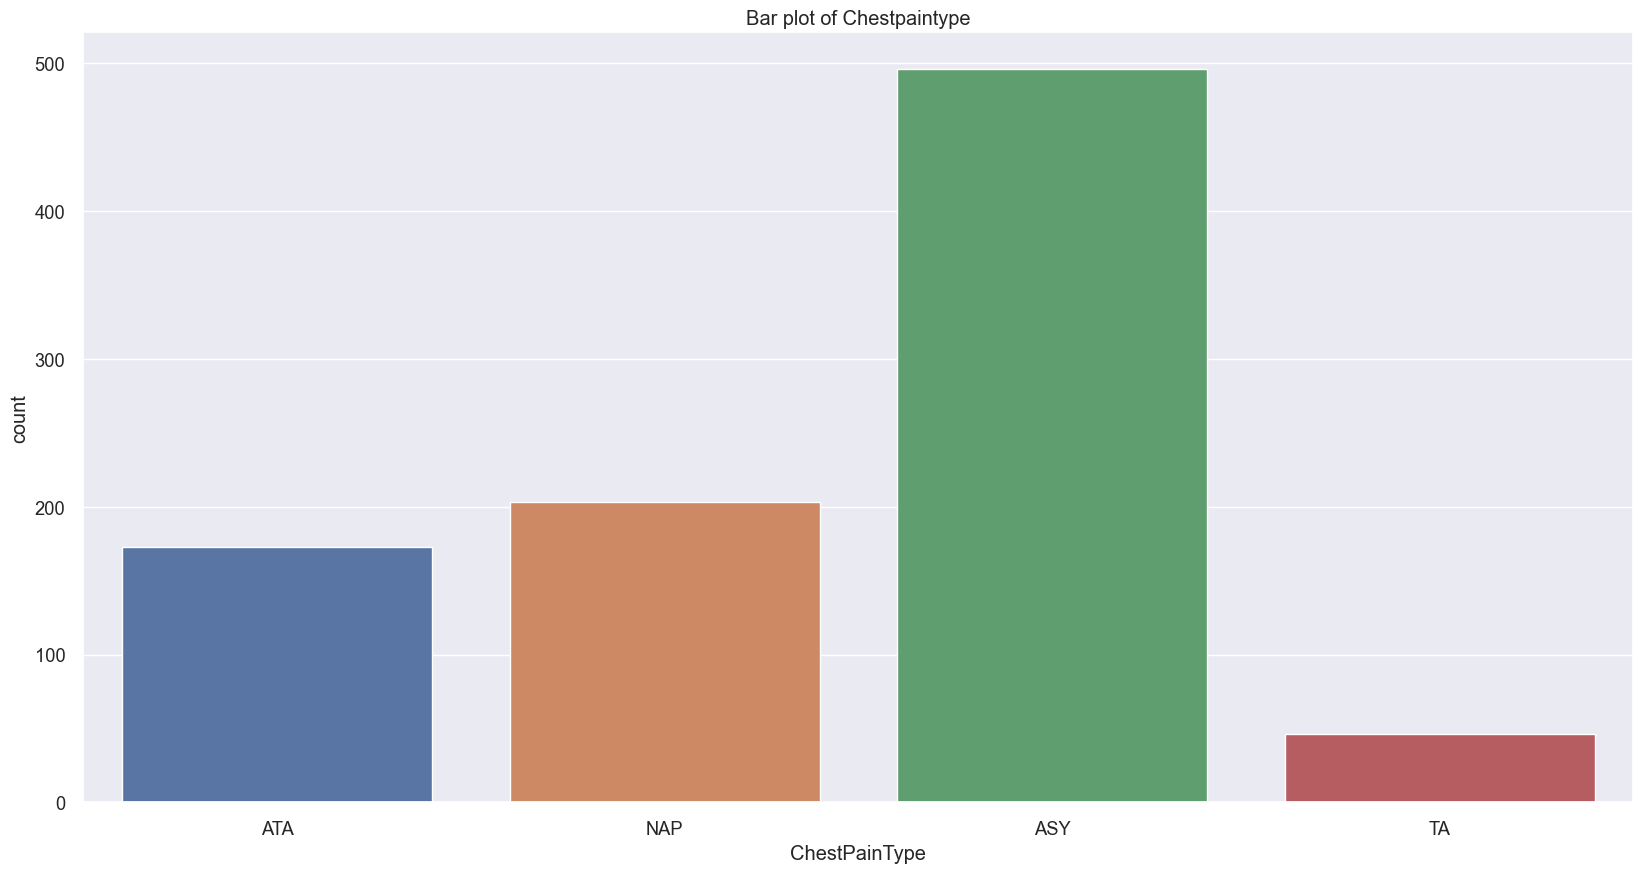

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64


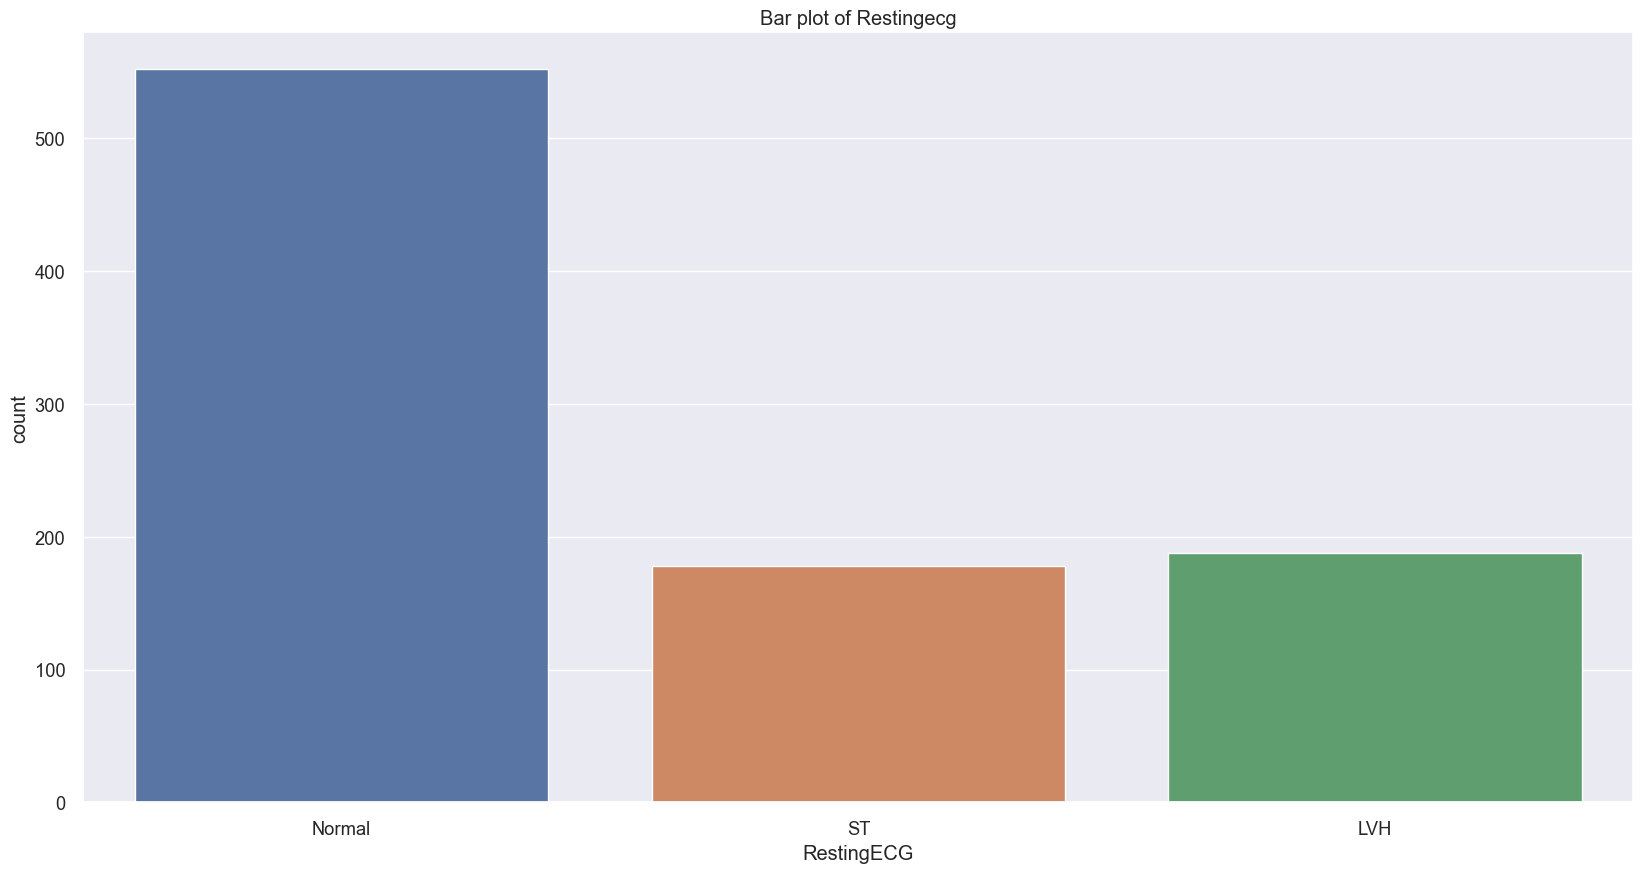

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64


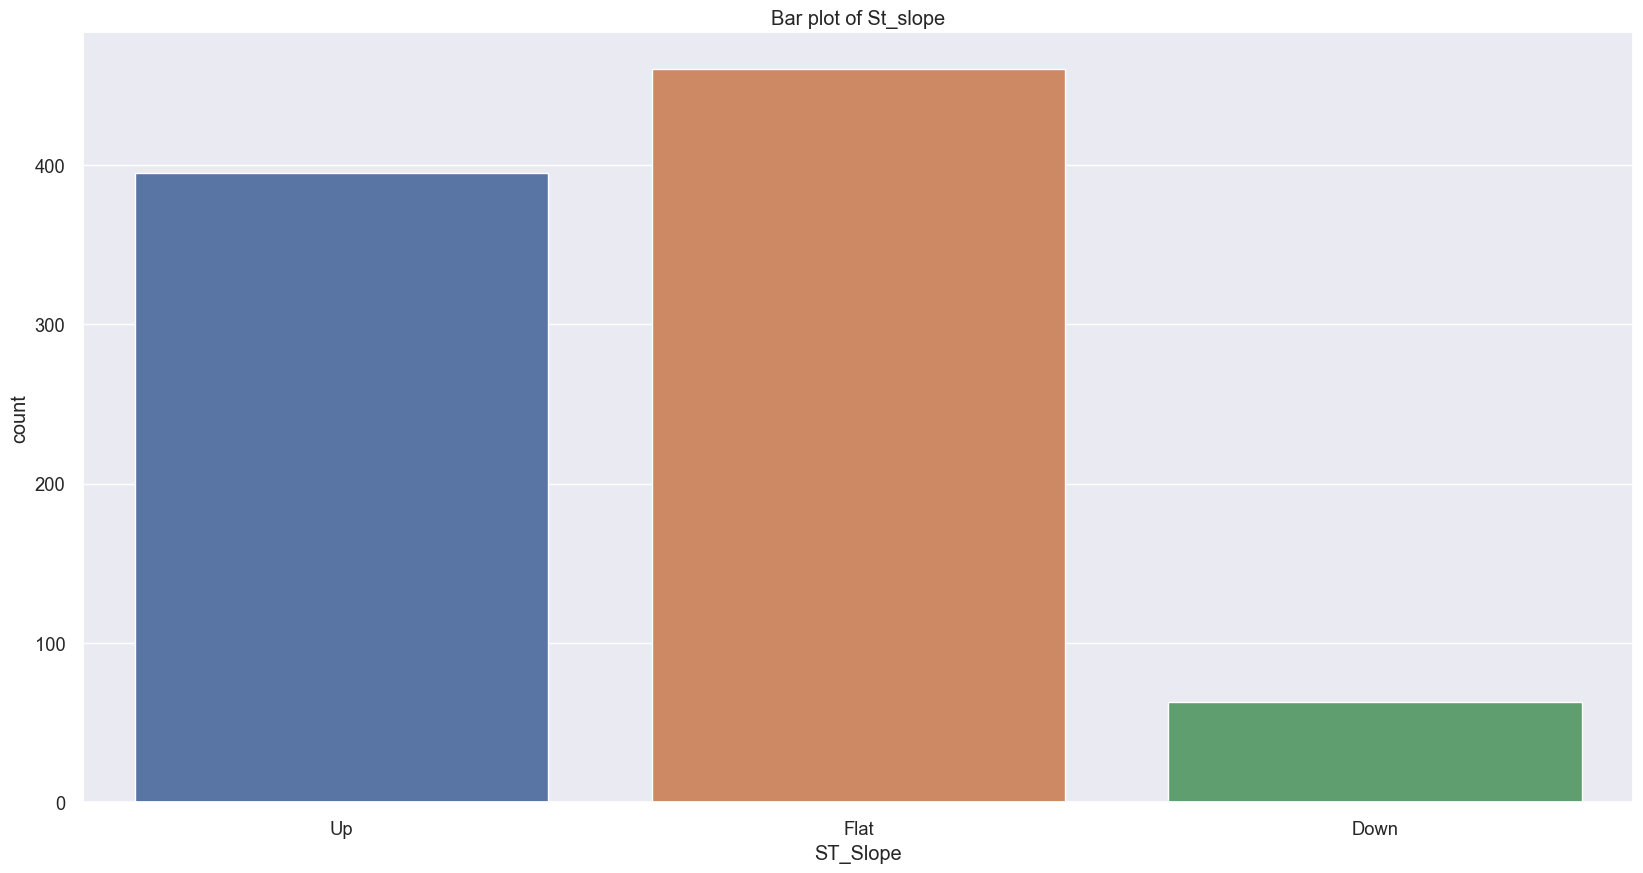

In [183]:
# EDA of categorical variables- frequency table, bar plot 
for var in categorical_var:  
    freq_table = df[var].value_counts(normalize=True)
    print(freq_table)
    sns.countplot(x=var, data=df)
    plt.title(f'Bar plot of {var.capitalize()}')
    plt.show()

M    0.78976
F    0.21024
Name: Sex, dtype: float64


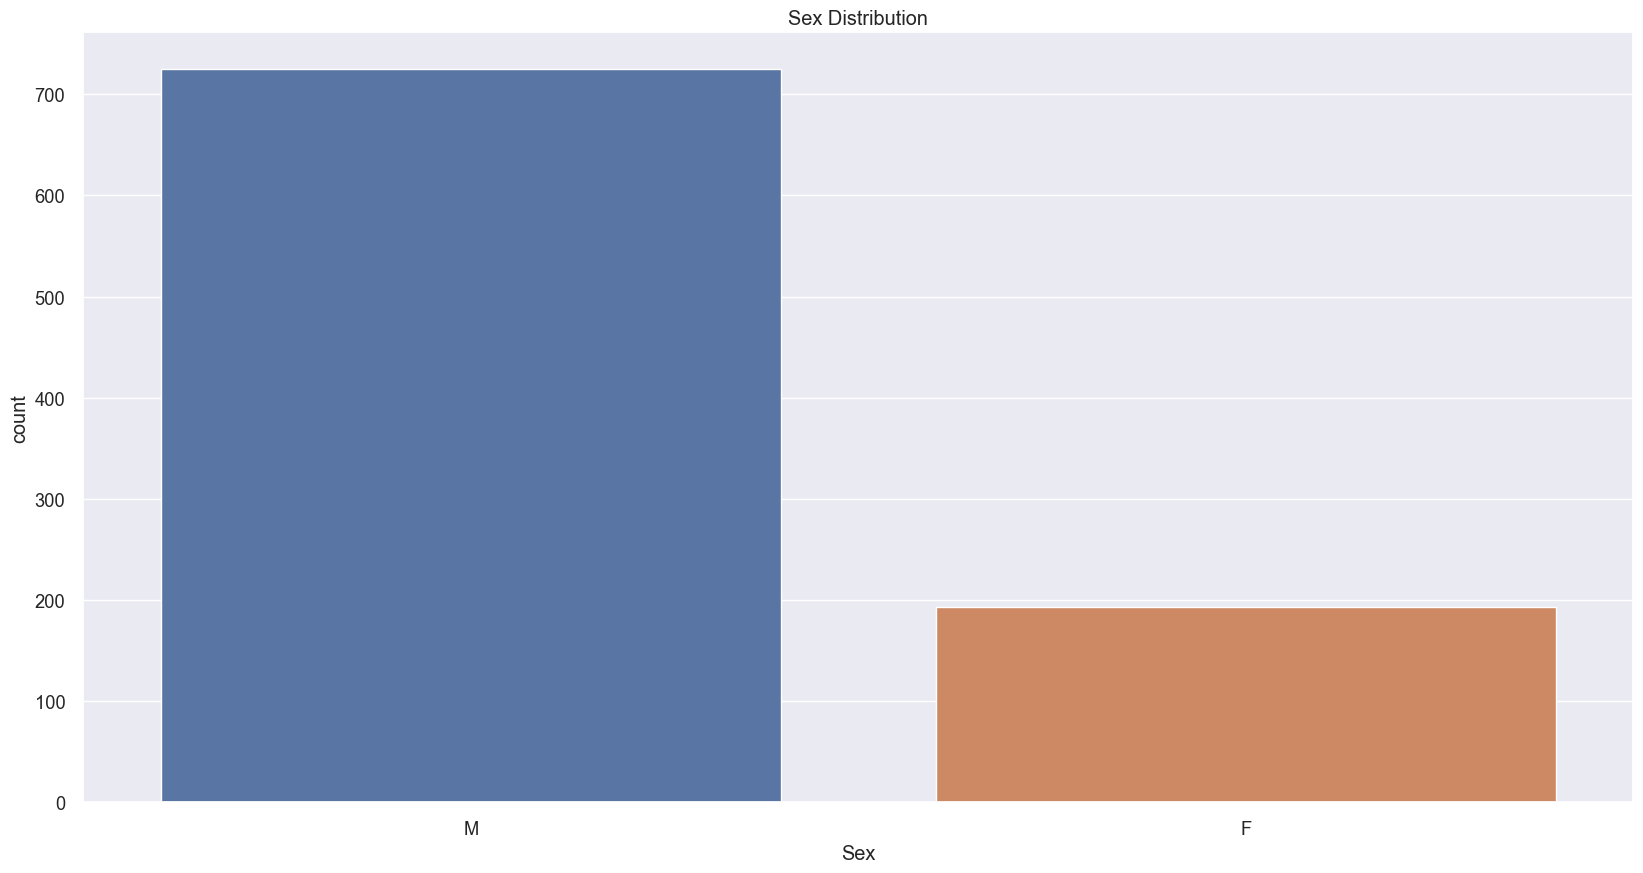

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64


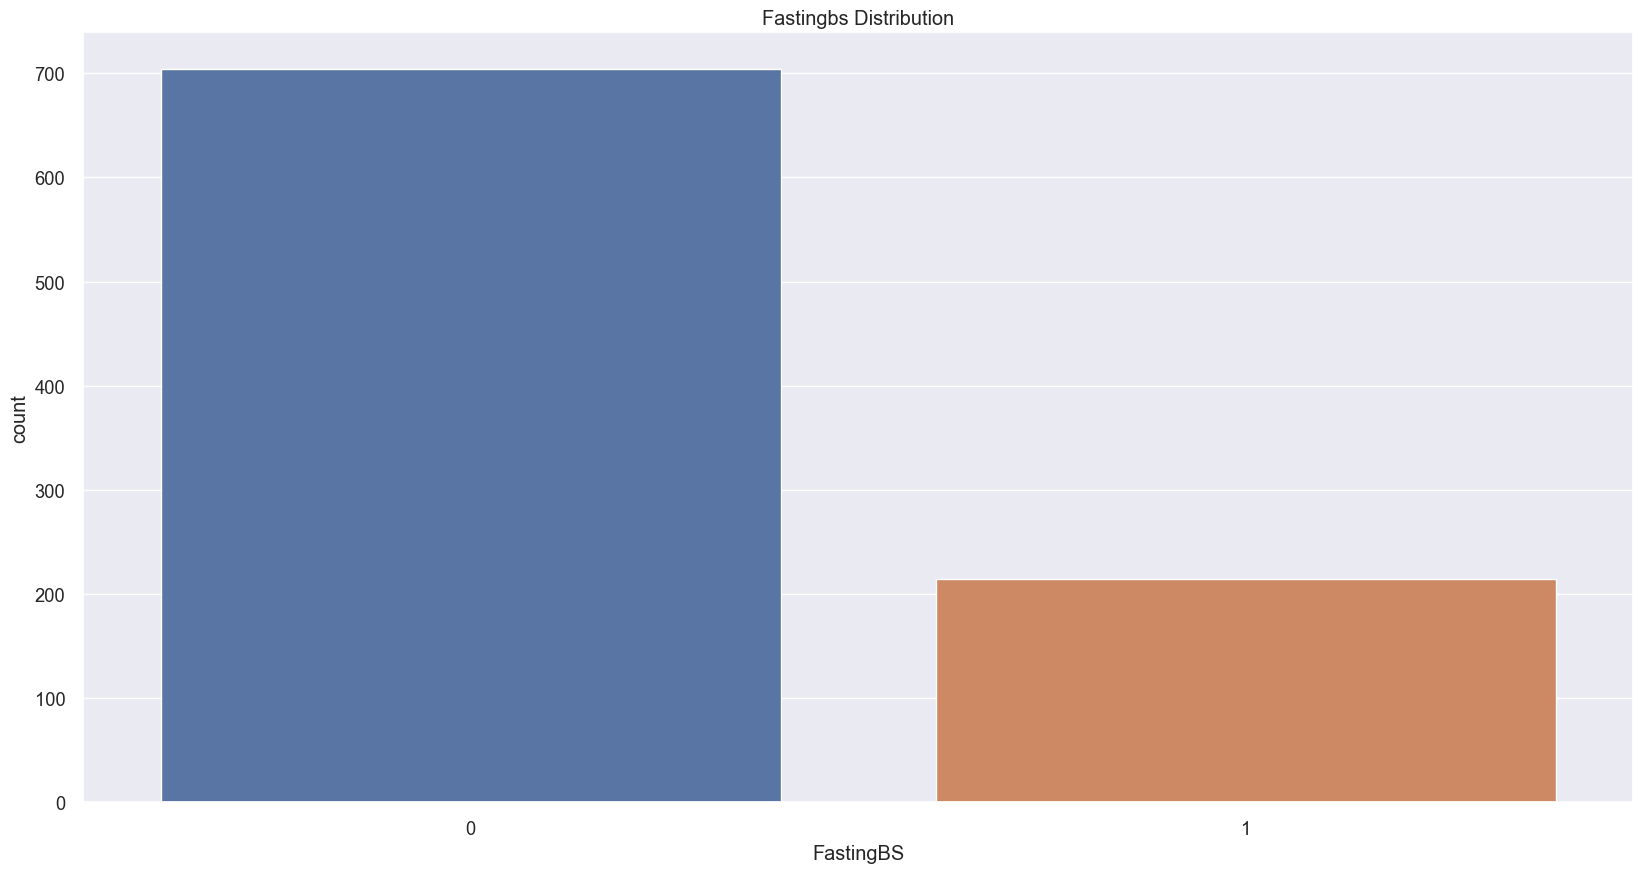

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64


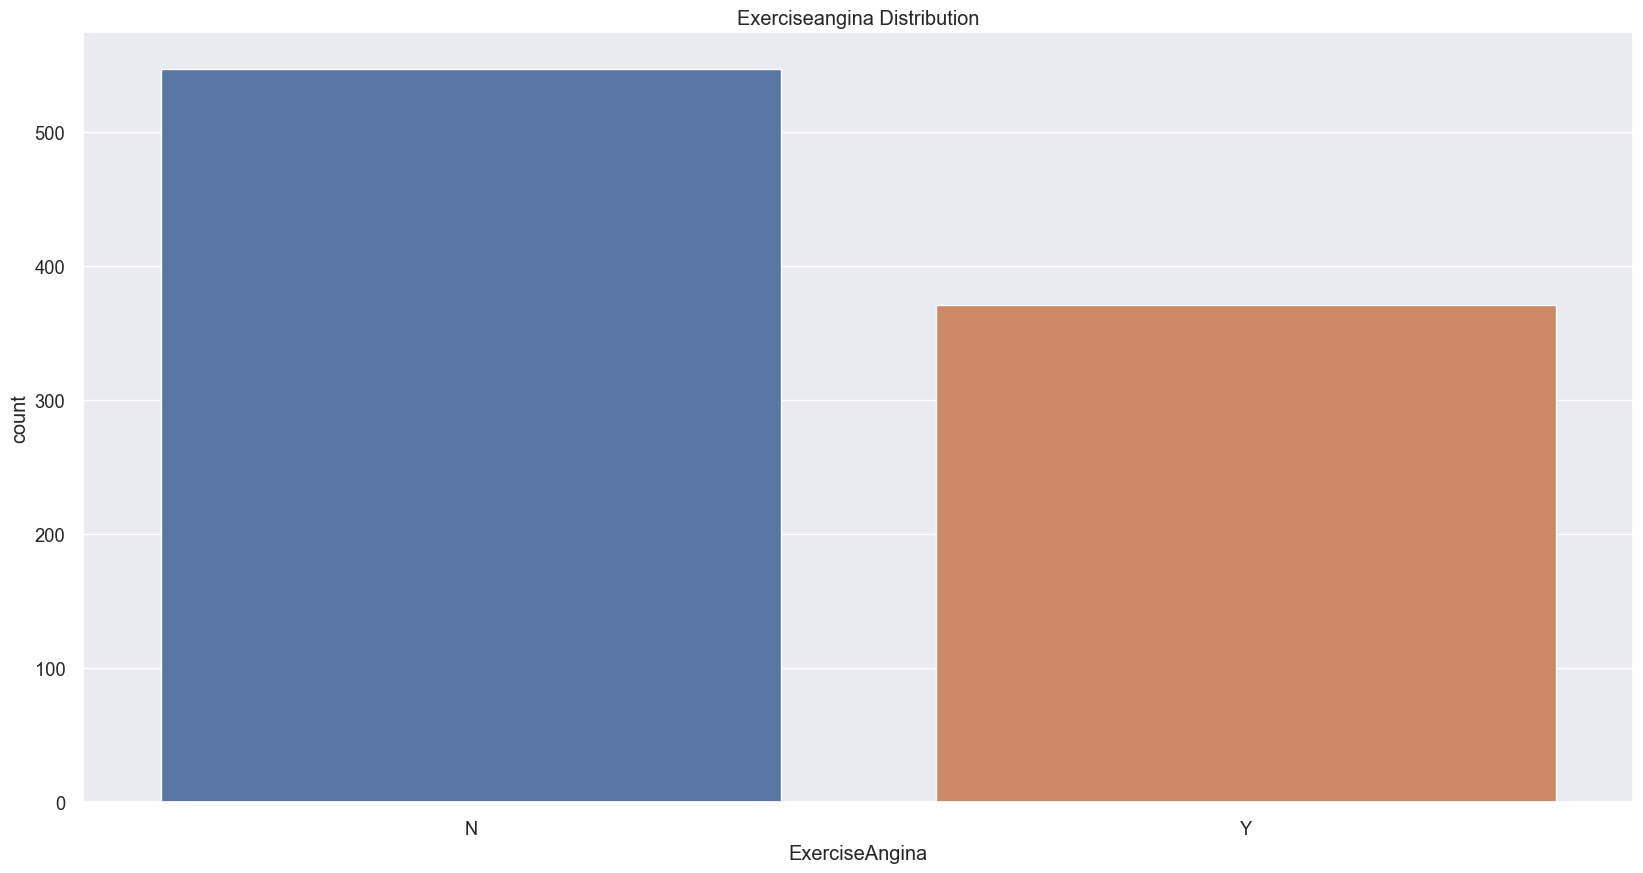

In [184]:
# EDA of binary variables - frequency table, bar plot
for var in binary_var:    
    print(df[var].value_counts(normalize=True))
    sns.countplot(x=var, data=df) 
    plt.title(f'{var.capitalize()} Distribution')    
    plt.show()

### Histogram and Density plots

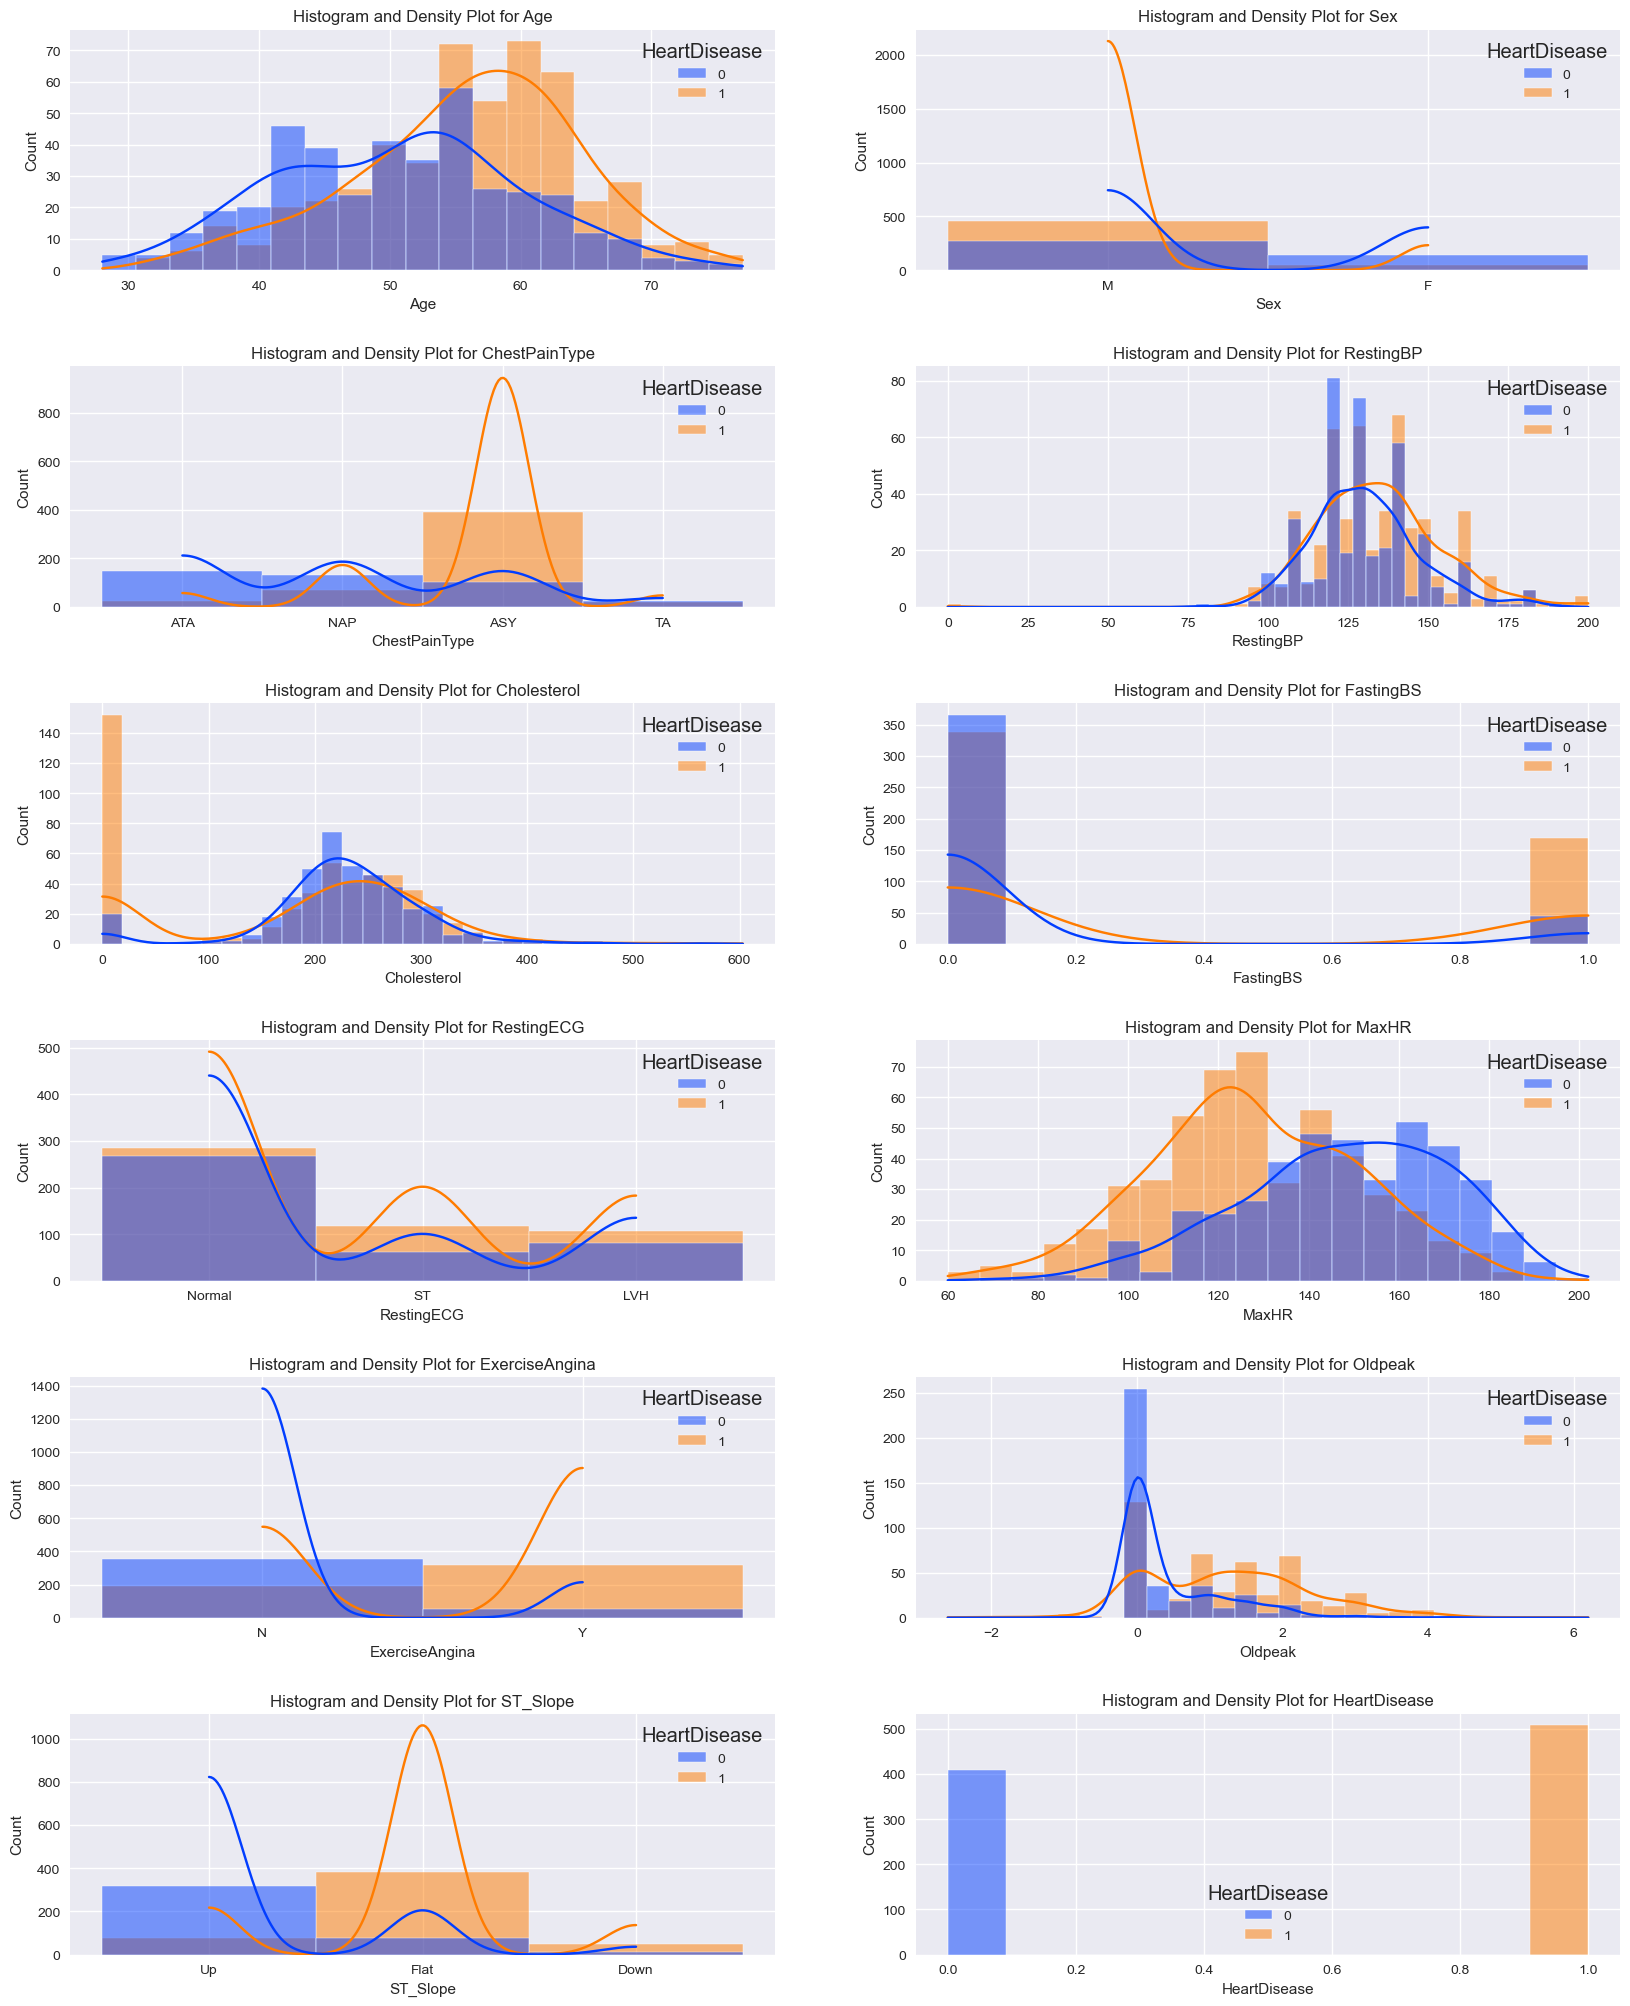

In [185]:
# Plot histograms and density plots for each continuos variable
plt.style.use("seaborn")
plt.figure(figsize=(20, 25))
palette = 'bright'
columns = list(df.columns)

for i, var in enumerate(columns):
    if i<12:
        plt.subplot(6, 2, i+1)    
        sns.histplot(data=df, x=var, kde=True, palette=palette, hue='HeartDisease')
        plt.title(f'Histogram and Density Plot for {var}')
        plt.xlabel(var)
plt.subplots_adjust(hspace=0.4)        
plt.show()

### Boxplots 

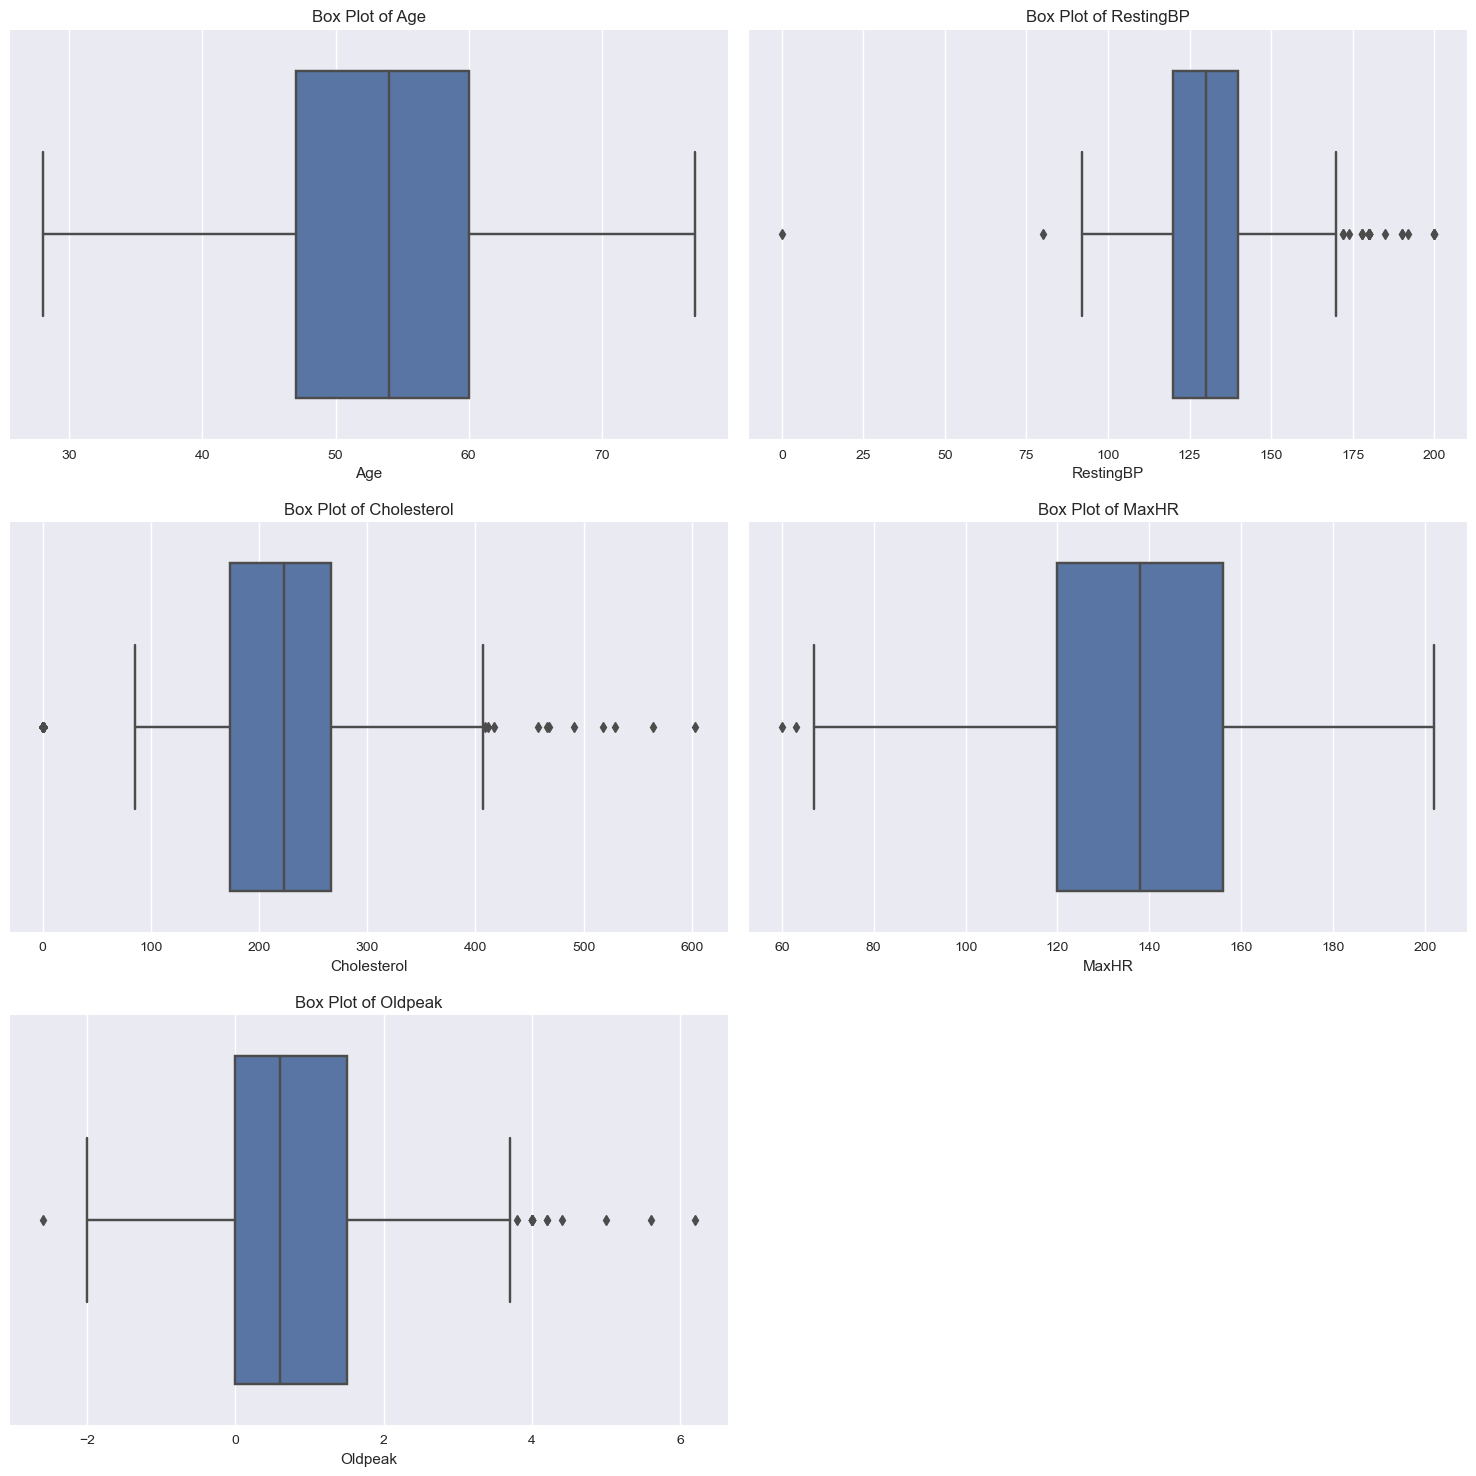

In [186]:
# set the number of columns for the subplots
num_cols = 2

# calculate the number of rows required to display all subplots
num_rows = len(continuous_var) // num_cols + (len(continuous_var) % num_cols > 0)

# create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# loop through each continuous variable and create a box plot
for i, var in enumerate(continuous_var):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(ax=axes[row, col], x=var, data=df)
    axes[row, col].set_title('Box Plot of {}'.format(var))
    
# remove any extra subplots
for j in range(len(continuous_var), num_rows*num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])
plt.subplots_adjust(hspace=0.5)   
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

### Outliers detection and Treatment 

In [187]:
# functions to detect and treat outliers
def detect_outliers(label=None):
    Q1, Q3 = df[label].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    interval = df[label].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    return df[interval], df[~interval]

def assign_mean(out, not_out, label=None):
    for hd in [0, 1]:
        df.loc[out[out["HeartDisease"] == hd].index, label] = not_out[not_out["HeartDisease"] == hd][label].mean()        

### Cholesterol

<AxesSubplot:xlabel='Cholesterol'>

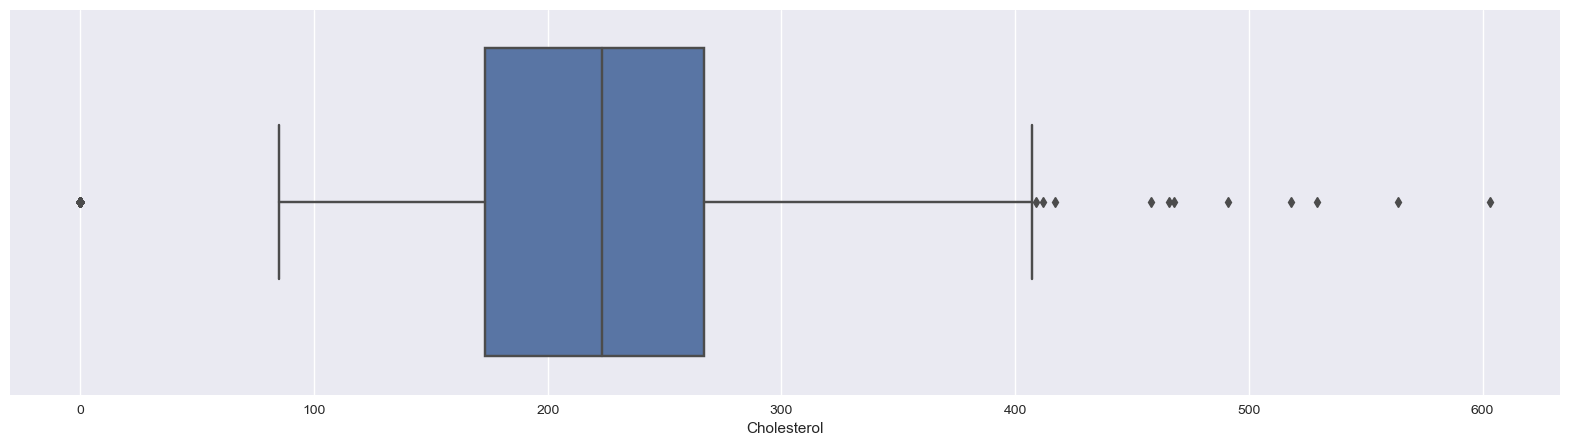

In [188]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Cholesterol")

In [189]:
not_out_ch, out_ch = detect_outliers('Cholesterol')
print(f'Outliers in cholesterol represent the {round((out_ch.shape[0]*100)/df.shape[0], 2)}% of our dataset')
out_ch

Outliers in cholesterol represent the 19.93% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


#### Observation
In cholestrol there are registers with zero values which are human errors, the best solution is to deleted these, while the rest of the register will be assigned the mean cholesterol of the data set. Outliers in cholesterol represent the 19.93% of our dataset

(746, 12)

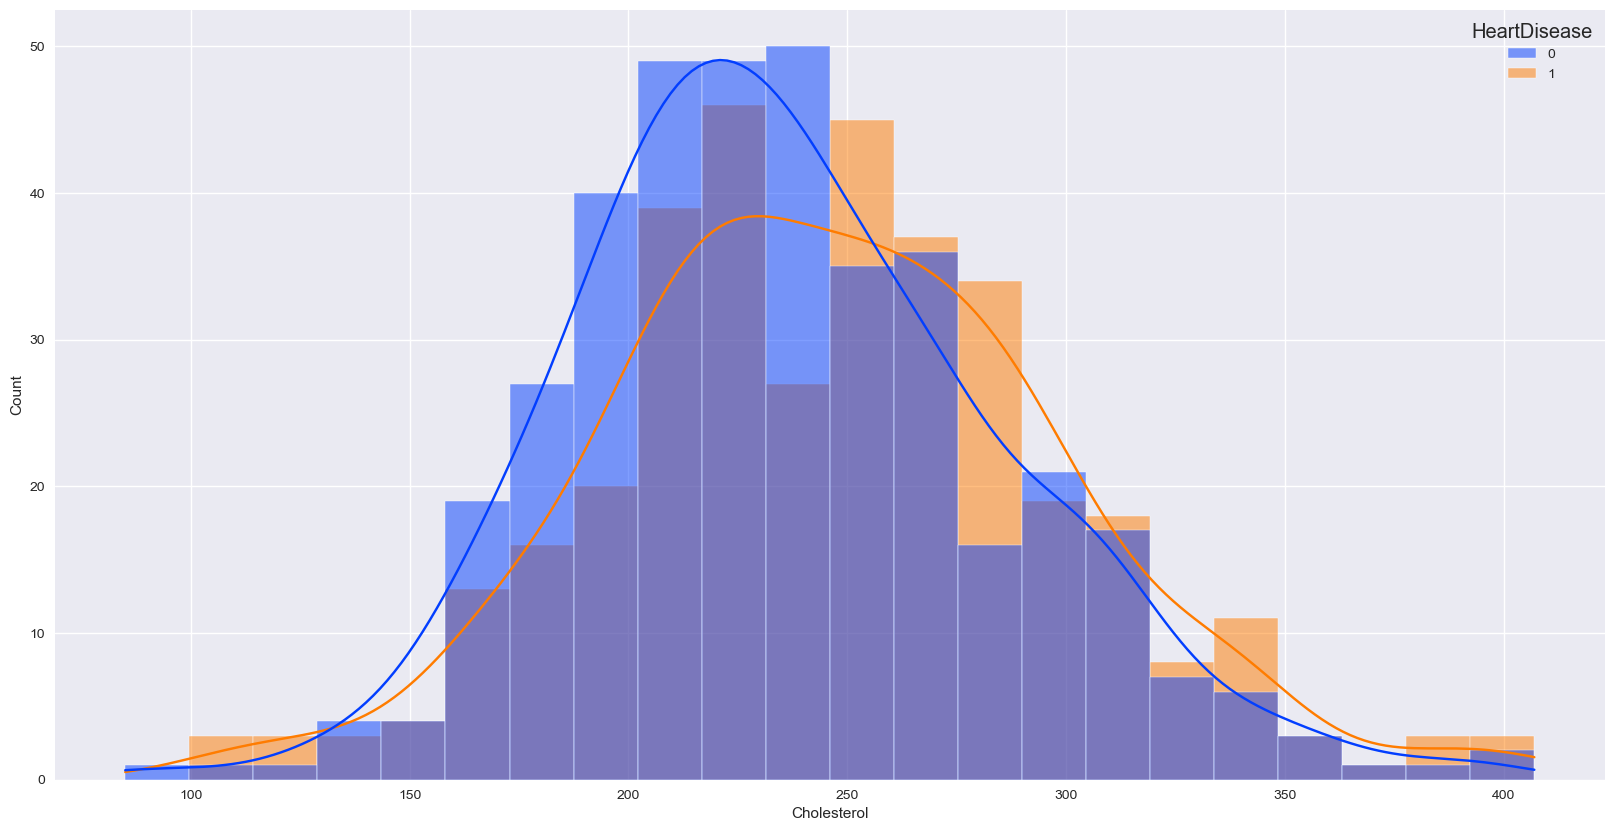

In [190]:
# Cholesterol outliers handling
df = df[df['Cholesterol']!=0]
assign_mean(out_ch[out_ch["Cholesterol"] != 0], not_out_ch, 'Cholesterol')

plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Cholesterol', kde=True, palette='bright', hue='HeartDisease')
df.shape

### Resting Blood Pressure

<AxesSubplot:xlabel='RestingBP'>

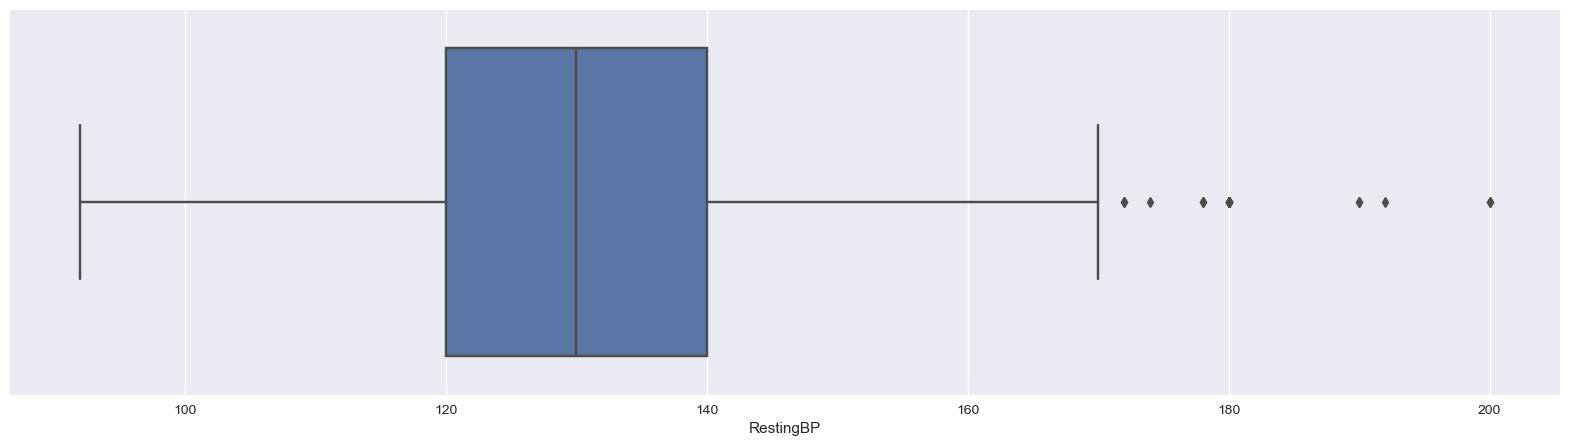

In [191]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="RestingBP")

In [192]:
not_out_rbp, out_rbp = detect_outliers('RestingBP')
print(f'Outliers in resting blood pressure represent the {round((out_rbp.shape[0]*100)/df.shape[0], 2)}% of our dataset')
out_rbp

Outliers in resting blood pressure represent the 2.68% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241.0,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393.0,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285.0,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280.0,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198.0,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295.0,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213.0,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347.0,0,ST,126,Y,0.8,Flat,0
550,55,M,ASY,172,260.0,0,Normal,73,N,2.0,Flat,1
585,57,M,ATA,180,285.0,1,ST,120,N,0.8,Flat,1


#### Observation
Since this is a small percentage we can delete them.Outliers in resting blood pressure represent the 4.29% of our dataset

In [193]:
# Resting BP outliers handling
for i in out_rbp.index:
    df = df.drop(i)
df.shape

(726, 12)

### Oldpeak

In [194]:
not_out_opk, out_opk = detect_outliers('Oldpeak')
print(f'Outliers in Oldpeak represent the {round((out_opk.shape[0]*100)/df.shape[0], 2)}% of our dataset')
out_opk

Outliers in Oldpeak represent the 1.79% of our dataset


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246.0,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231.0,0,ST,140,Y,5.0,Flat,1
500,65,M,ASY,136,248.0,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282.0,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258.0,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273.0,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407.0,0,LVH,154,N,4.0,Flat,1
771,55,M,ASY,140,217.0,0,Normal,111,Y,5.6,Down,1
775,38,M,TA,120,231.0,0,Normal,182,Y,3.8,Flat,1
791,51,M,ASY,140,298.0,0,Normal,122,Y,4.2,Flat,1


In [195]:
# Oldpeak outliers handling
for i in out_opk.index:
    df = df.drop(i)
df.shape

(713, 12)

### Pie charts - Heart disease in Females and Males

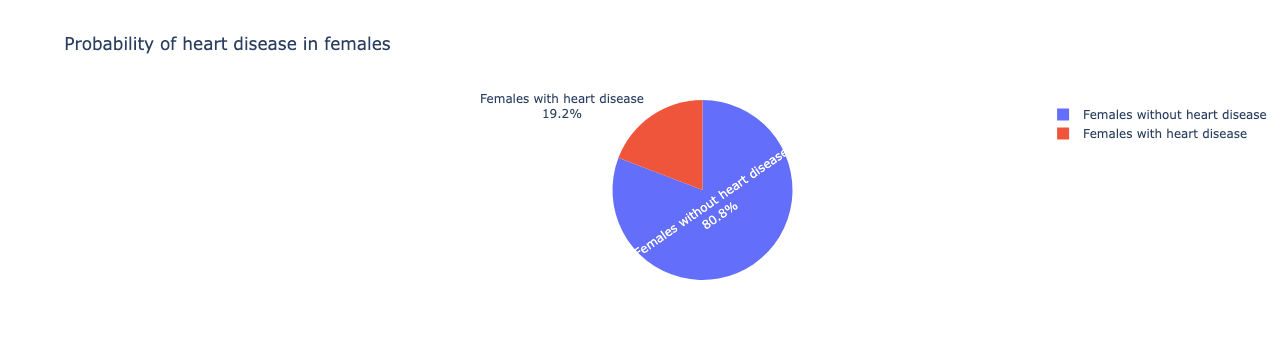

In [196]:
# Calculate the counts and percentages
counts = [df[(df["Sex"] == 'F') & (df["HeartDisease"] == 0)].count().to_numpy()[0],
          df[(df["Sex"] == 'F') & (df["HeartDisease"] == 1)].count().to_numpy()[0]]
total = sum(counts)
percentages = [count/total*100 for count in counts]

# Define the labels 
labels = ["Females without heart disease", "Females with heart disease"]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=percentages,
                             textinfo='label+percent'
                            )])

# Set the chart title and legend
fig.update_layout(title_text='Probability of heart disease in females', showlegend=True)

# Show the chart
fig.show()

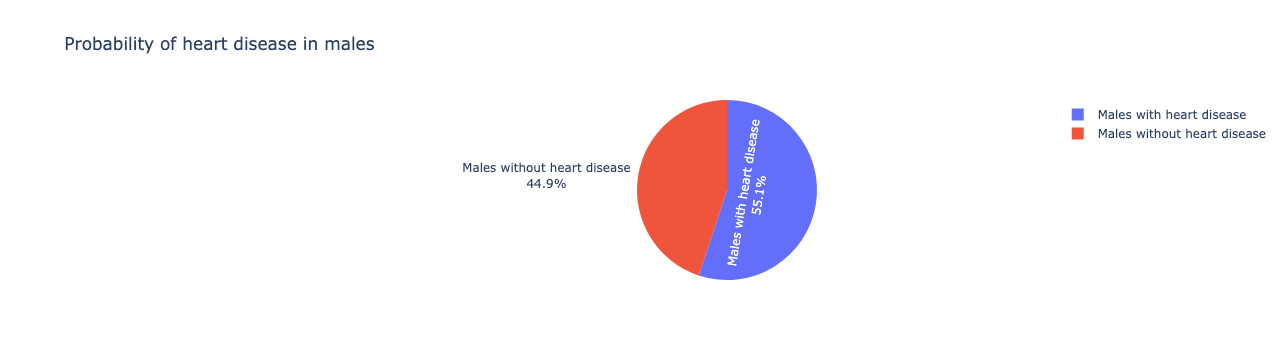

In [197]:
# Calculate the counts and percentages
counts = [df[(df["Sex"] == 'M') & (df["HeartDisease"] == 0)].count().to_numpy()[0],
          df[(df["Sex"] == 'M') & (df["HeartDisease"] == 1)].count().to_numpy()[0]]
total = sum(counts)
percentages = [count/total*100 for count in counts]

# Define the labels 
labels = ["Males without heart disease", "Males with heart disease"]


# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=percentages,
                             textinfo='label+percent'
                            )])

# Set the chart title and legend
fig.update_layout(title_text='Probability of heart disease in males', showlegend=True)

# Show the chart
fig.show()

### Feature Encoding

In [198]:
# Define the mapping dictionaries
sex_map = {'M': 1, 'F': 0}
exercise_map = {'N': 0, 'Y': 1}

# Map the values using the dictionaries
df['Sex'] = df['Sex'].map(sex_map)
df['ExerciseAngina'] = df['ExerciseAngina'].map(exercise_map)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289.0,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180.0,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283.0,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214.0,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195.0,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264.0,0,Normal,132,0,1.2,Flat,1
914,68,1,ASY,144,193.0,1,Normal,141,0,3.4,Flat,1
915,57,1,ASY,130,131.0,0,Normal,115,1,1.2,Flat,1
916,57,0,ATA,130,236.0,0,LVH,174,0,0.0,Flat,1


### Data Binning

This code discretizes the continuous features in the original dataframe df into 5 bins and creates a new dataframe df_bin that contains the binned values. This is useful when working with machine learning algorithms that require categorical data, as continuous features can be difficult to work with directly.

In [199]:
# Define the number of bins
bins = 5

# Create a copy of the dataframe
df_bin = df.copy()

# Bin each continuous feature
for feature in continuous_var:
    df_bin[feature] = pd.cut(df[feature], bins=bins, labels=False).astype(int)
df_bin

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,ATA,3,3,0,Normal,3,0,0,Up,0
1,2,0,NAP,4,1,0,Normal,3,0,1,Flat,1
2,0,1,ATA,2,3,0,ST,1,0,0,Up,0
3,2,0,ASY,2,2,0,Normal,1,1,2,Flat,1
4,2,1,NAP,3,1,0,Normal,1,0,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,1,TA,1,2,0,Normal,2,0,1,Flat,1
914,4,1,ASY,3,1,1,Normal,2,0,4,Flat,1
915,2,1,ASY,2,0,0,Normal,1,1,1,Flat,1
916,2,0,ATA,2,2,0,LVH,3,0,0,Flat,1


### One-hot Encode

In [200]:
# Create a list of features to one-hot encode
features_to_encode = categorical_var + continuous_var

# One-hot encode the selected features
df_dumm = pd.get_dummies(df_bin, columns=features_to_encode)
df_dumm

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,...,MaxHR_0,MaxHR_1,MaxHR_2,MaxHR_3,MaxHR_4,Oldpeak_0,Oldpeak_1,Oldpeak_2,Oldpeak_3,Oldpeak_4
0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
914,1,1,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
915,1,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
916,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


### Correlation computation

<AxesSubplot:>

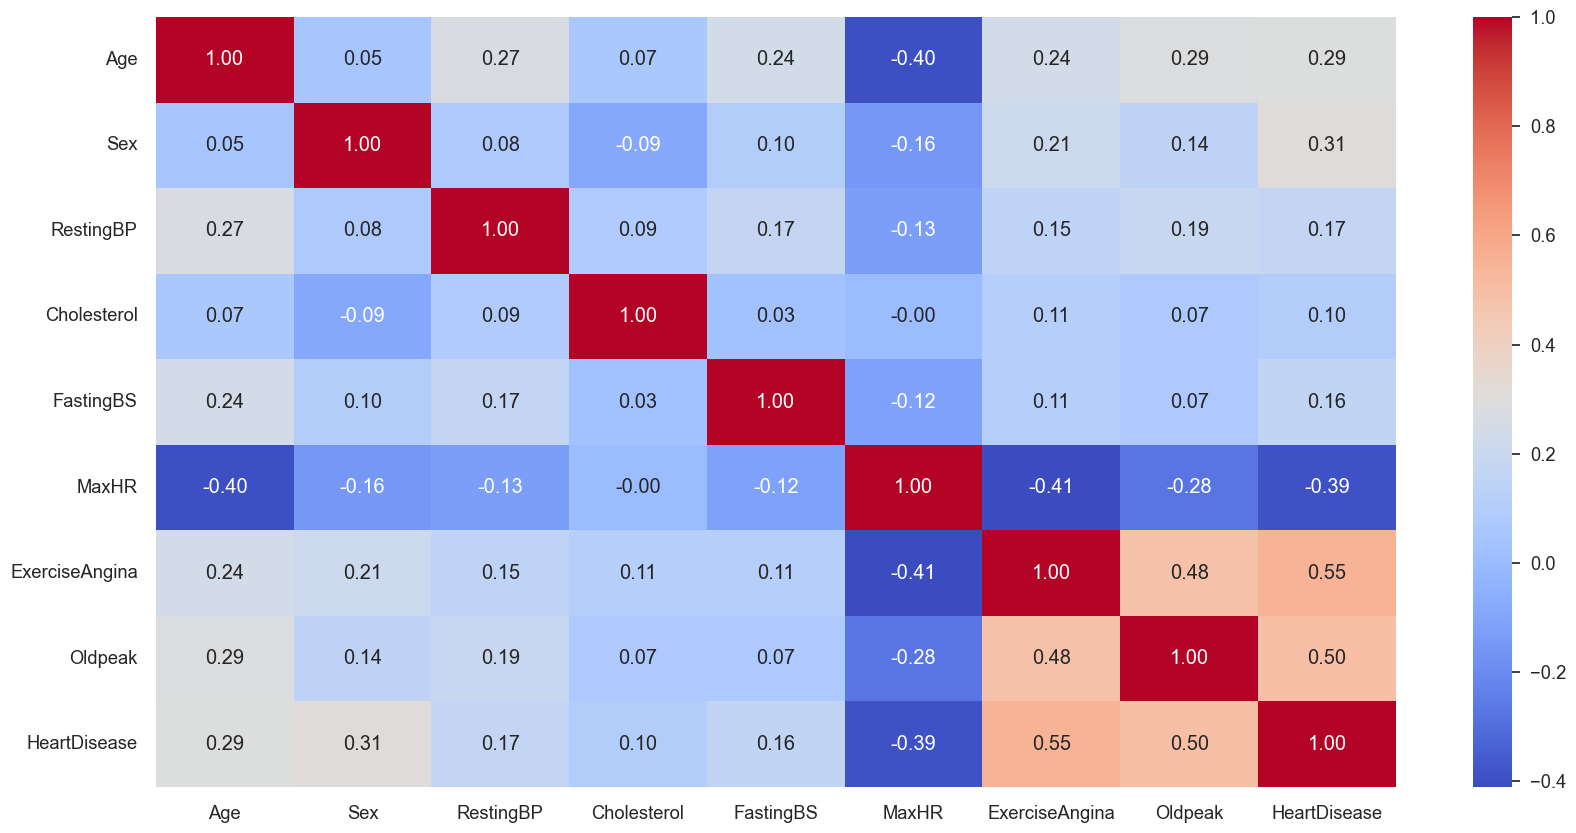

In [201]:
# Compute the correlation matrix
corr = df.corr()

# Set the figure size and font scale
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.2)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [202]:
# Compute the correlation coefficients and sort them in descending order
df_corr = df_dumm.corr()['HeartDisease'].sort_values(ascending=False)
df_corr

HeartDisease         1.000000
ST_Slope_Flat        0.606063
ExerciseAngina       0.549594
ChestPainType_ASY    0.522760
Sex                  0.307948
Oldpeak_2            0.286330
MaxHR_1              0.248172
Age_3                0.231030
Oldpeak_4            0.205033
Oldpeak_3            0.178541
FastingBS            0.160581
Oldpeak_1            0.123364
RestingBP_4          0.117451
MaxHR_0              0.103976
ST_Slope_Down        0.102803
RestingECG_ST        0.088794
Cholesterol_3        0.088486
Age_4                0.085272
RestingBP_3          0.081389
MaxHR_2              0.081099
RestingECG_LVH       0.066322
Cholesterol_4        0.045321
Cholesterol_0        0.011541
RestingBP_2         -0.011129
Cholesterol_2       -0.015179
Age_2               -0.038042
ChestPainType_TA    -0.050771
RestingBP_0         -0.072372
Cholesterol_1       -0.081825
RestingBP_1         -0.109401
RestingECG_Normal   -0.124279
Age_0               -0.137516
Age_1               -0.165213
MaxHR_4   

### Divide data into training and testset

In [203]:
# Make a copy of the one-hot encoded dataframe
df_clean = df_dumm.copy()

# Separate the features and target variable
X = df_clean.drop("HeartDisease", axis=1)
y = df_clean["HeartDisease"]

# Split the data into training and testing sets
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y, random_state=42)
X_train.shape, X_test.shape

((570, 38), (143, 38))

### Plot ROC curve and Compute Performance Metrics

In [204]:
scoring_metric = 'recall'
cv = 15
n_features = len(X_train.columns)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
def print_scores(y_true, y_pred):
    ac = accuracy_score(y_true, y_pred)
    pr = precision_score(y_true, y_pred)
    rc = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Accuracy: {round(ac,4)}")
    print(f"Precision: {round(pr,4)}")
    print(f"Recall: {round(rc, 4)}")
    print(f"F1-score: {round(f1, 4)}")
    return {'accuracy': ac, 'precision': pr, 'recall': rc, 'f1-score': f1}

### 1. Logistic regression model

In [205]:
# Create a logistic regression model with a higher maximum number of iterations
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_test_pred = lr_model.predict(X_test)

# Calculate the accuracy of the model's predictions
accuracy = lr_model.score(X_test, y_test)

print(" Logistic Regression Model Accuracy:", round(accuracy,4))

 Logistic Regression Model Accuracy: 0.8881


### Model performance on test data

<AxesSubplot:>

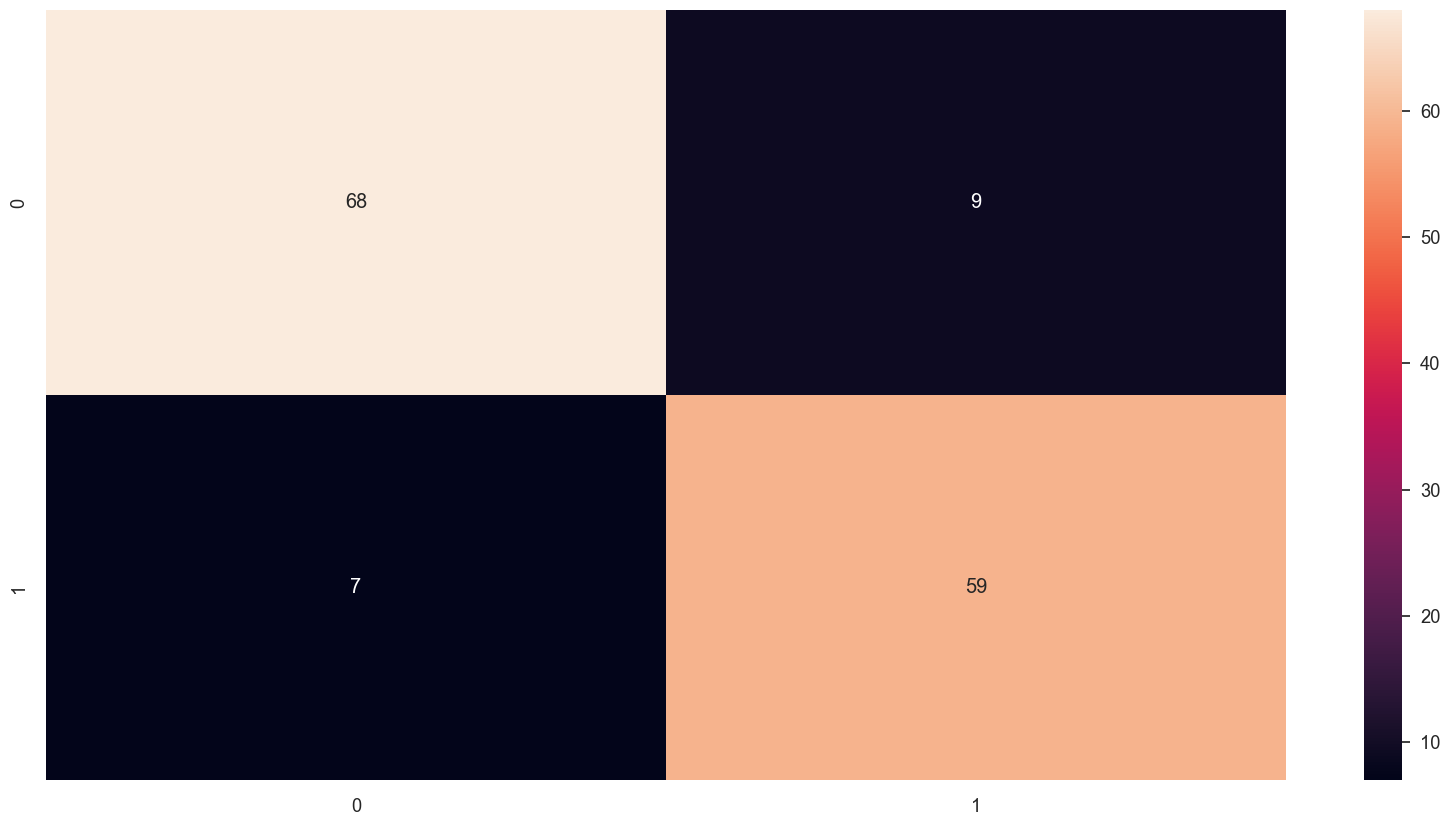

In [206]:
# Display the confusion matrix using a heatmap
confusion_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

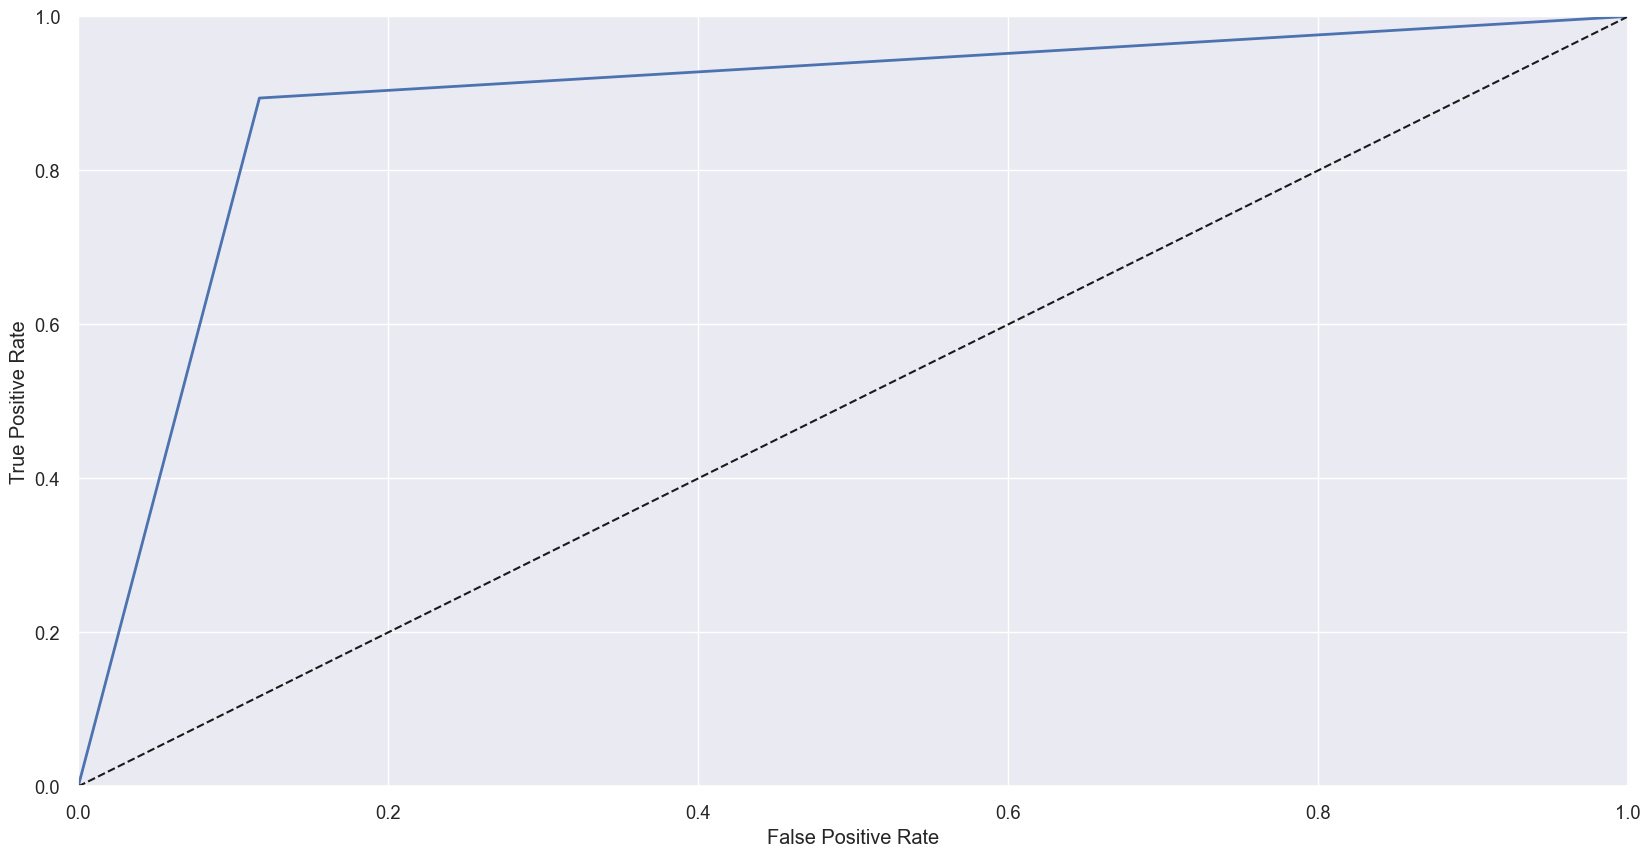

AUC score: 0.8885


In [207]:
# Plot ROC curve and compute AUC score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "Logistic Regression")
plt.show()
auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC score: {round(auc_score,4)}')

In [208]:
# Display performance metric score for Random Forest classifier
lr_metrics = print_scores(y_test, y_test_pred)

Accuracy: 0.8881
Precision: 0.8676
Recall: 0.8939
F1-score: 0.8882


### 2. Decision Tree Classifier Model

In [209]:
# Create a Decision Tree Classifier model with maximum depth of 3 and random state of 42
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree Classifier model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = dt_model.predict(X_test)

# Calculate the accuracy score of the Decision Tree Classifier model
accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Classifier accuracy:", round(accuracy,4))

Decision Tree Classifier accuracy: 0.8951


<AxesSubplot:>

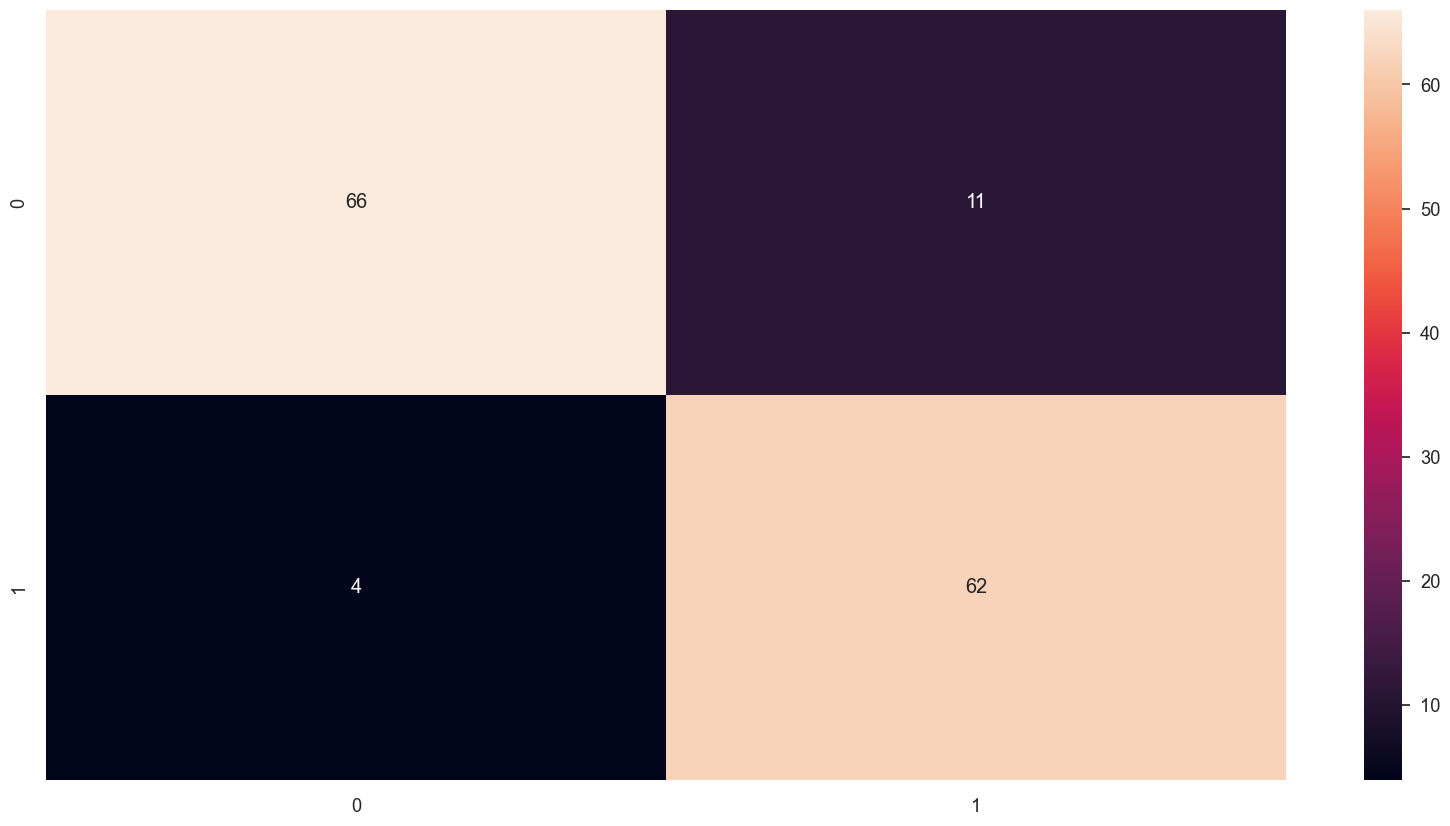

In [210]:
# Display the confusion matrix using a heatmap
confusion_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

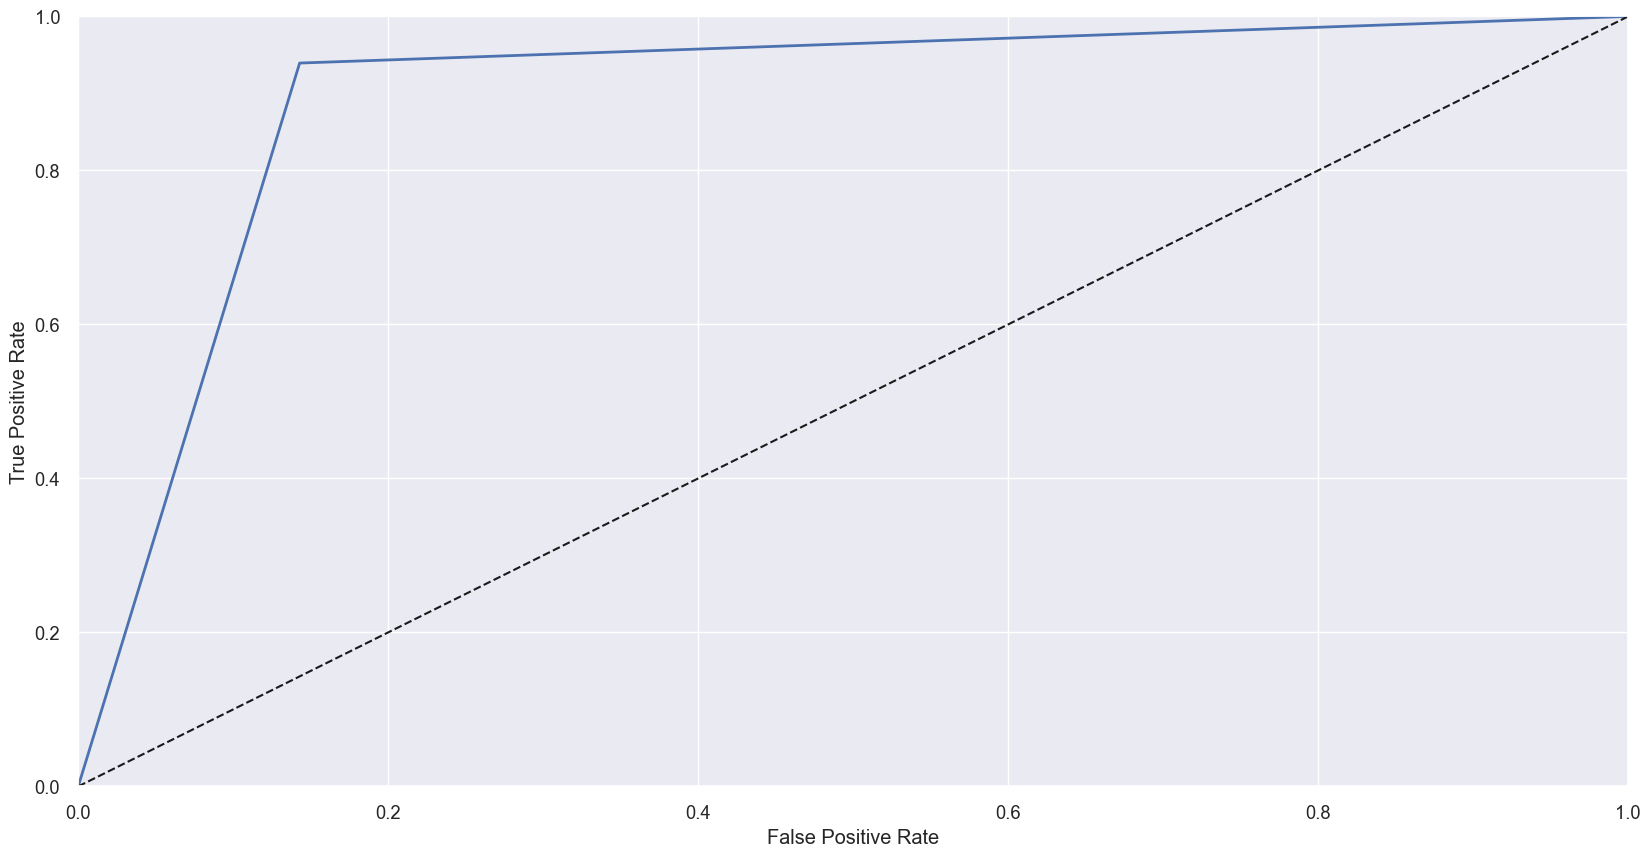

AUC score: 0.8983


In [211]:
# Plot ROC curve and compute AUC score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "Logistic Regression")
plt.show()
auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC score: {round(auc_score,4)}')

In [212]:
# Display performance metric score for Random Forest classifier
dt_metrics = print_scores(y_test, y_test_pred)

Accuracy: 0.8951
Precision: 0.8493
Recall: 0.9394
F1-score: 0.8952


### 3. K-Nearest Neighbors Classifier
Hyperparameter tuning for the K-Nearest Neighbors (KNN) classifier using GridSearchCV. It searches for the best combination of hyperparameters from a given range of values for 'n_neighbors', 'weights', and 'p'. It then trains the KNN classifier with the best hyperparameters on the training data and evaluates its performance using cross-validation. 

In [213]:
param_grid = [{ 'n_neighbors':np.arange(5, 21), 'weights':['uniform', 'distance'],
    'p':[1, 2],
}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=cv, scoring=scoring_metric)
grid_search.fit(X_train, y_train)

best_knn_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

### Model performance on training data

<AxesSubplot:>

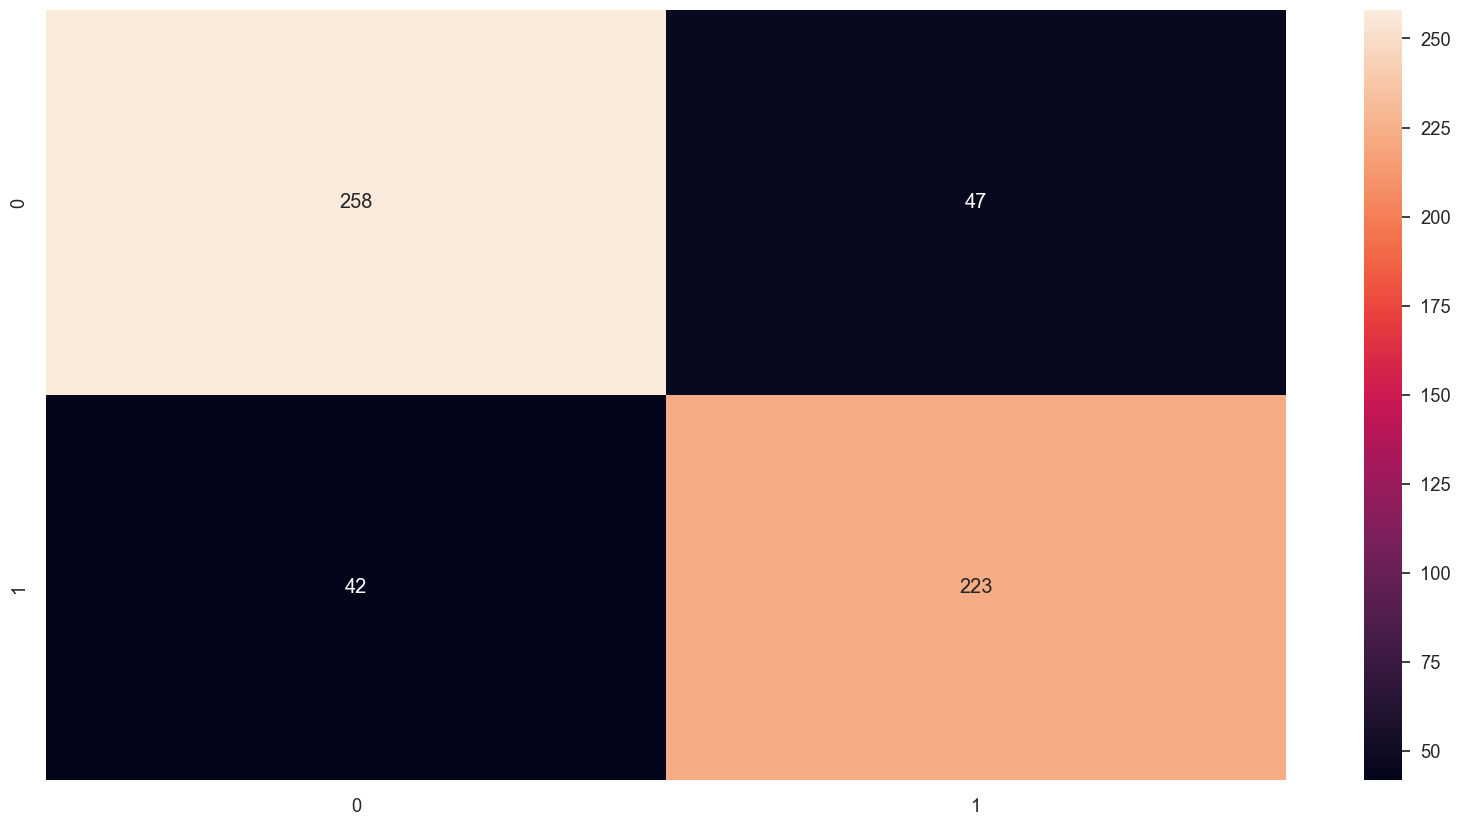

In [214]:
# Display the confusion matrix using a heatmap
y_train_pred = cross_val_predict(best_knn_clf, X_train, y_train, cv=cv)
confusion_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

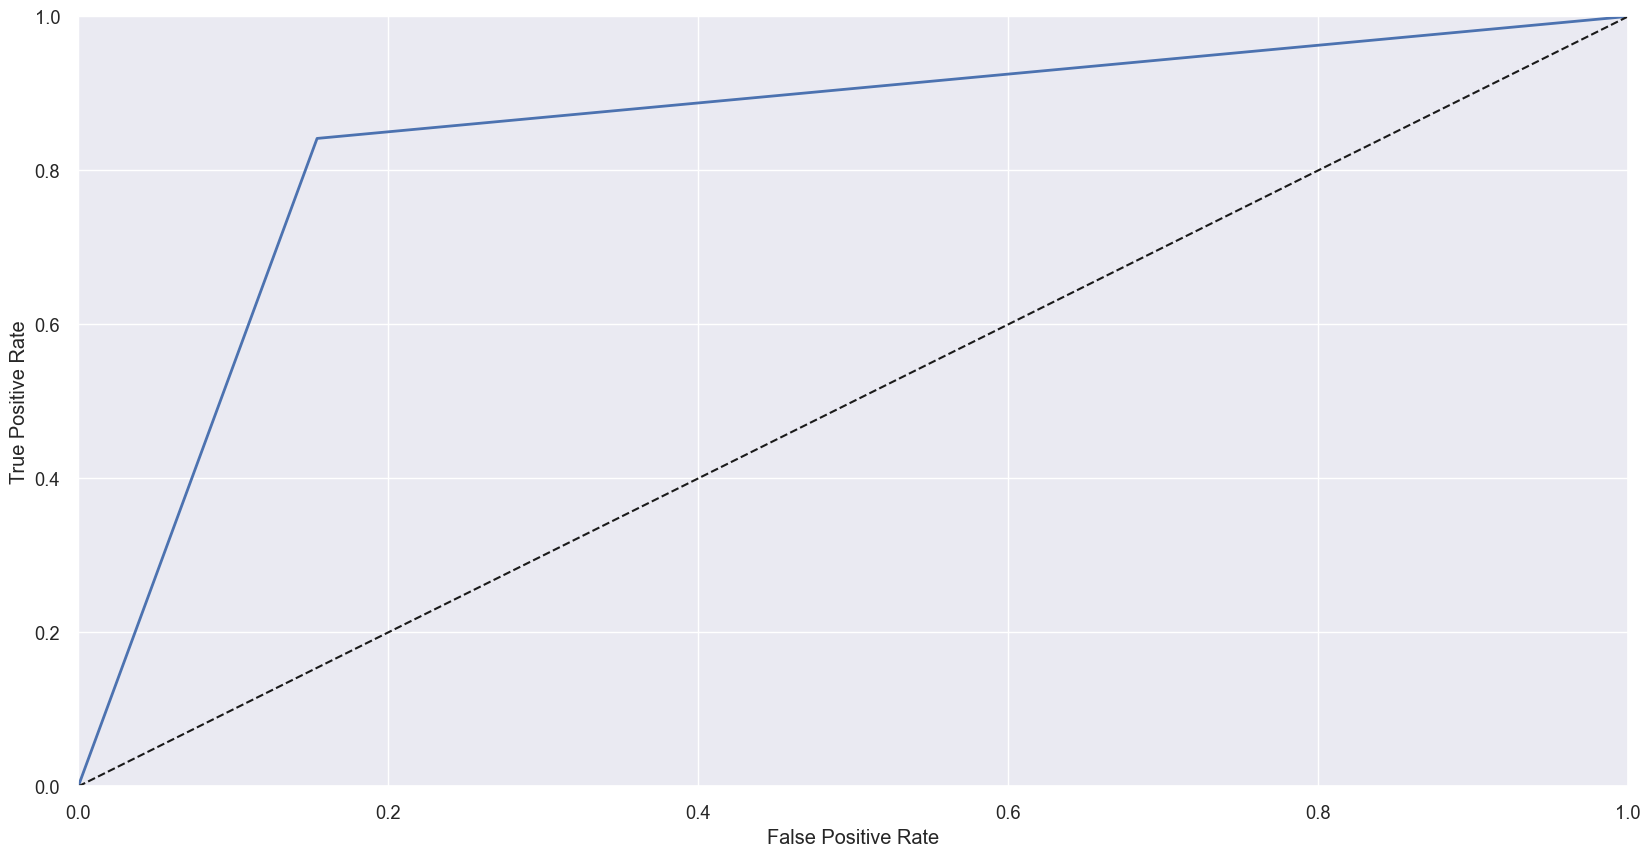

AUC: 0.8437


In [215]:
# Compute the FPR, TPR, and thresholds for the K-Nearest Neighbors classifier's predictions on the training set
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Plot the ROC curve for the K-Nearest Neighbors classifier
plot_roc_curve(fpr, tpr, "K-Nearest Neighbors")

# Display the plot
plt.show()
score = roc_auc_score(y_train, y_train_pred)
print(f'AUC: {round(score, 4)}')

### Model performance on Test data

<AxesSubplot:>

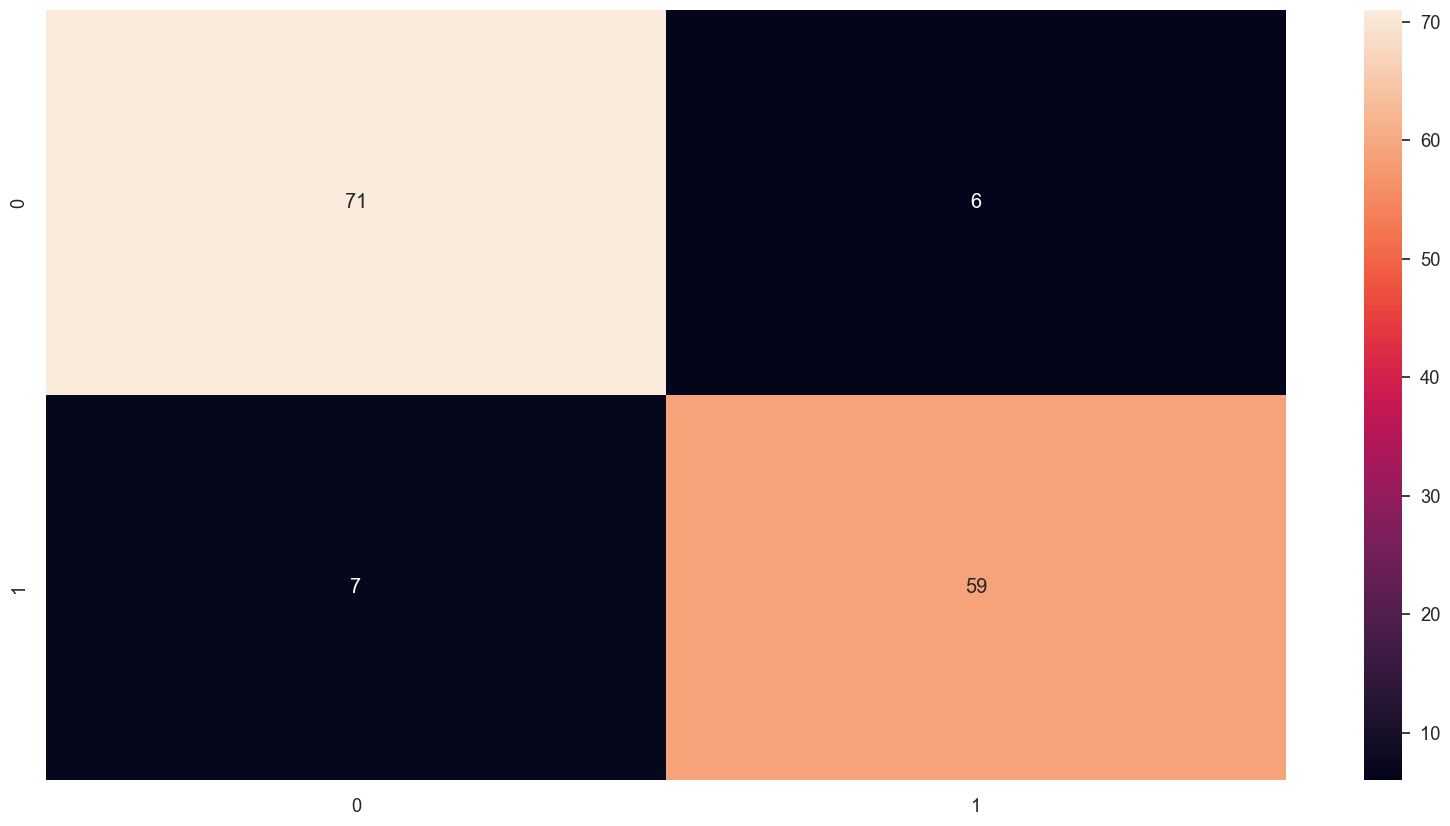

In [216]:
# Perform cross-validation prediction on the test data using the best KNN classifier
y_test_pred = cross_val_predict(best_knn_clf, X_test, y_test, cv=cv)

# Compute the confusion matrix
confusion_mx = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using a heatmap
sns.heatmap(confusion_mx, annot=True, fmt='')

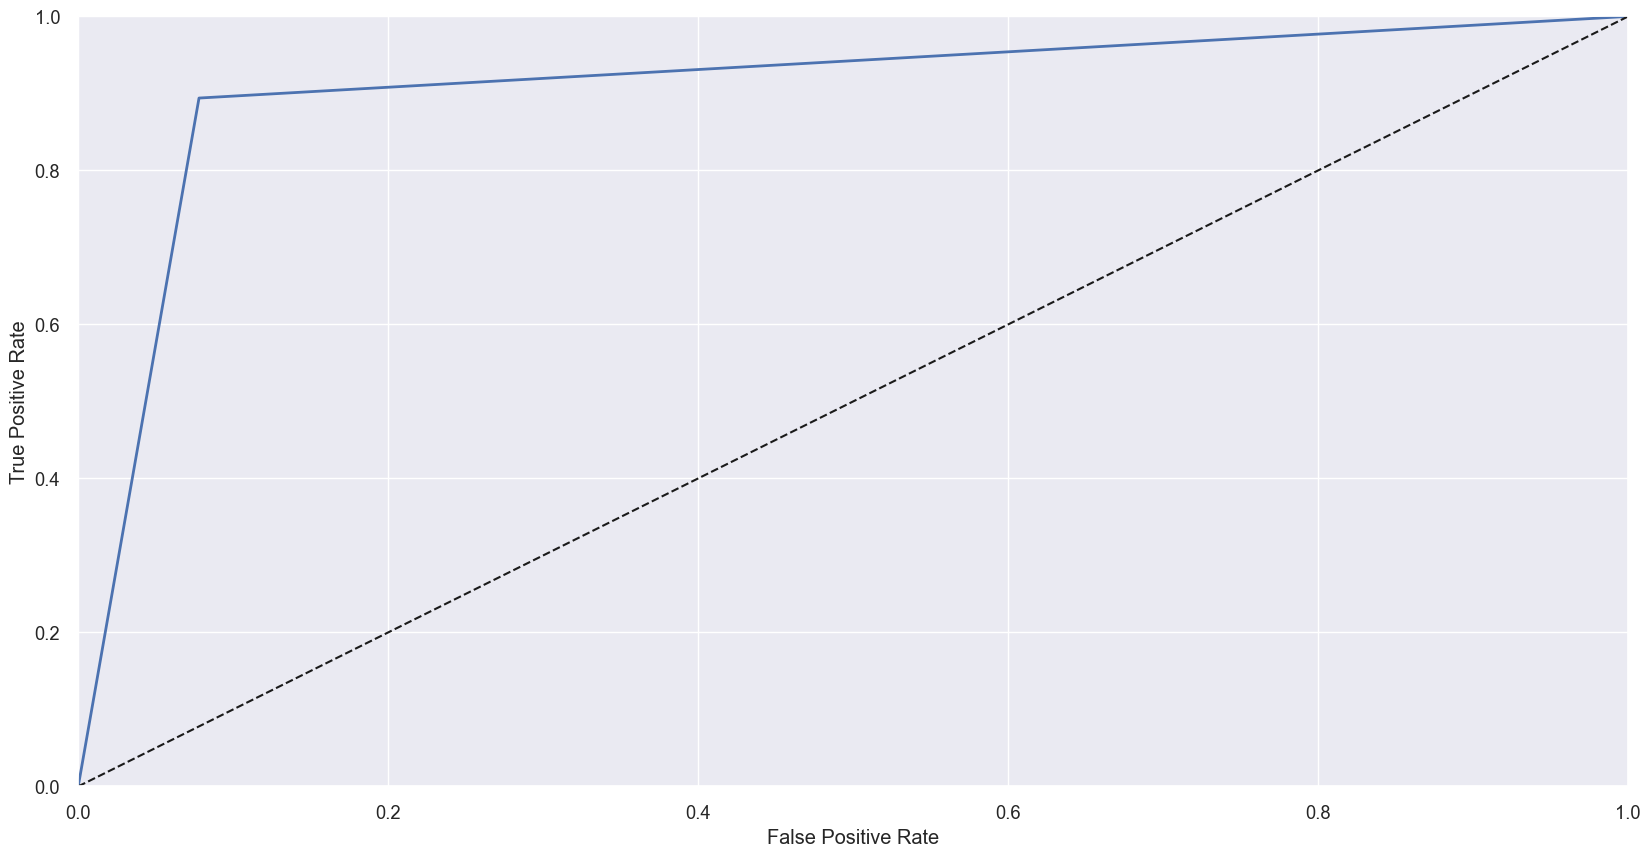

AUC score: 0.908


In [217]:
# Plot ROC curve and compute AUC score
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbors")
plt.show()
auc_score = roc_auc_score(y_test, y_test_pred)
print(f'AUC score: {round(auc_score,4)}')

In [218]:
# Display performance metric score for KNN classifier
knn_metrics = print_scores(y_test, y_test_pred)

Accuracy: 0.9091
Precision: 0.9077
Recall: 0.8939
F1-score: 0.909


### 4. Support Vector Machine Classifier
Perform a grid search to find the best hyperparameters for a support vector machine (SVM) classifier using cross-validation. The optimized hyperparameters are then used to train the SVM classifier on the training data, make predictions on the training data, and generate a confusion matrix visualization.

<AxesSubplot:>

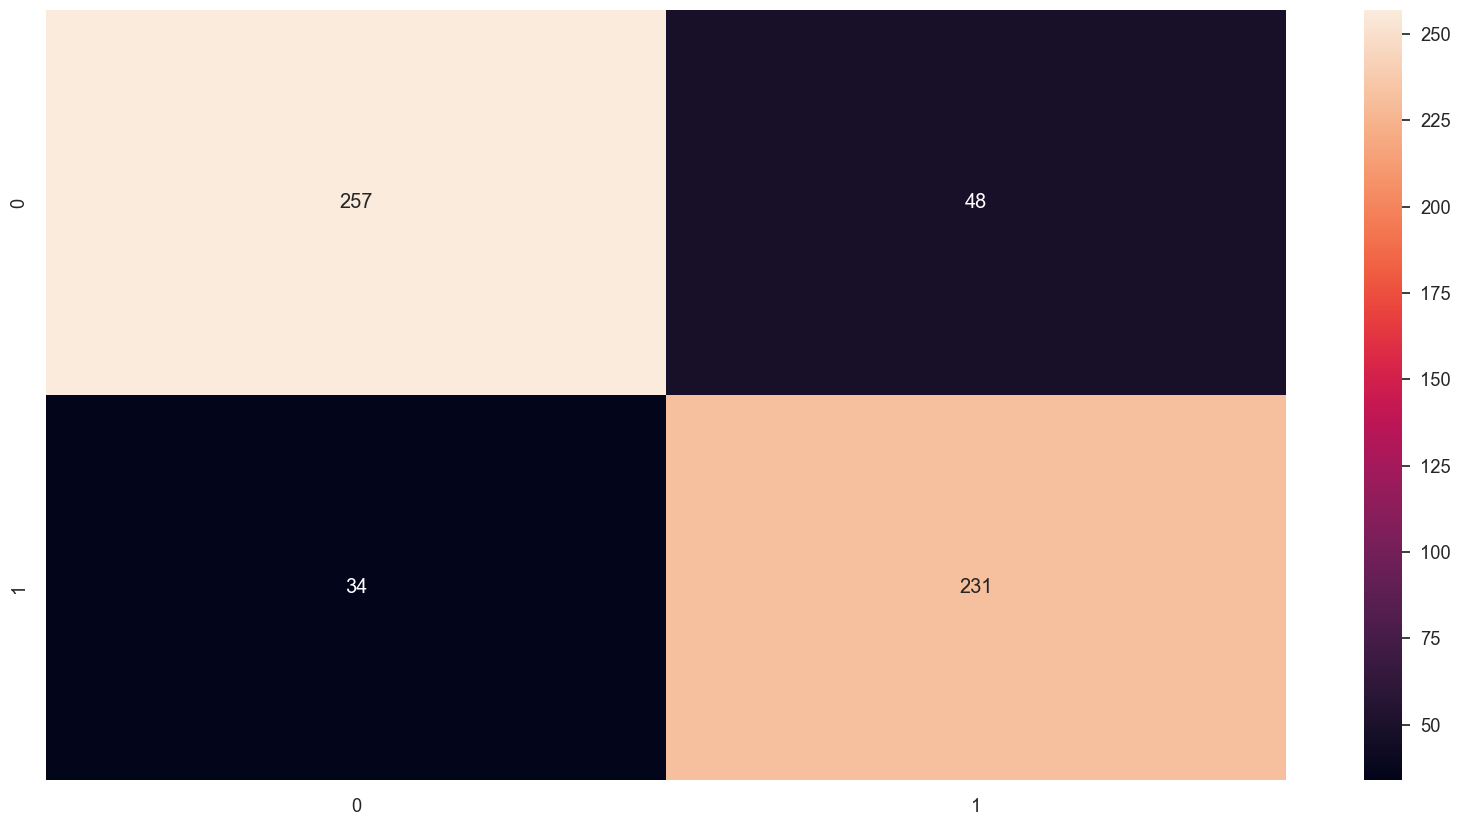

In [219]:
# Define the hyperparameter grid to search
param_grid = [{
    "C": np.linspace(1, 1.5, 10),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto']
}]

# Initialize and fit the grid search object
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, scoring=scoring_metric, cv=cv)
grid_search.fit(X_train, y_train)

# Retrieve the best estimator and best hyperparameters found
best_svm_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best estimator to make predictions on the training data
y_train_pred = cross_val_predict(best_svm_clf, X_train, y_train, cv=cv)

# Generate and display the confusion matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

### Model performance on train data

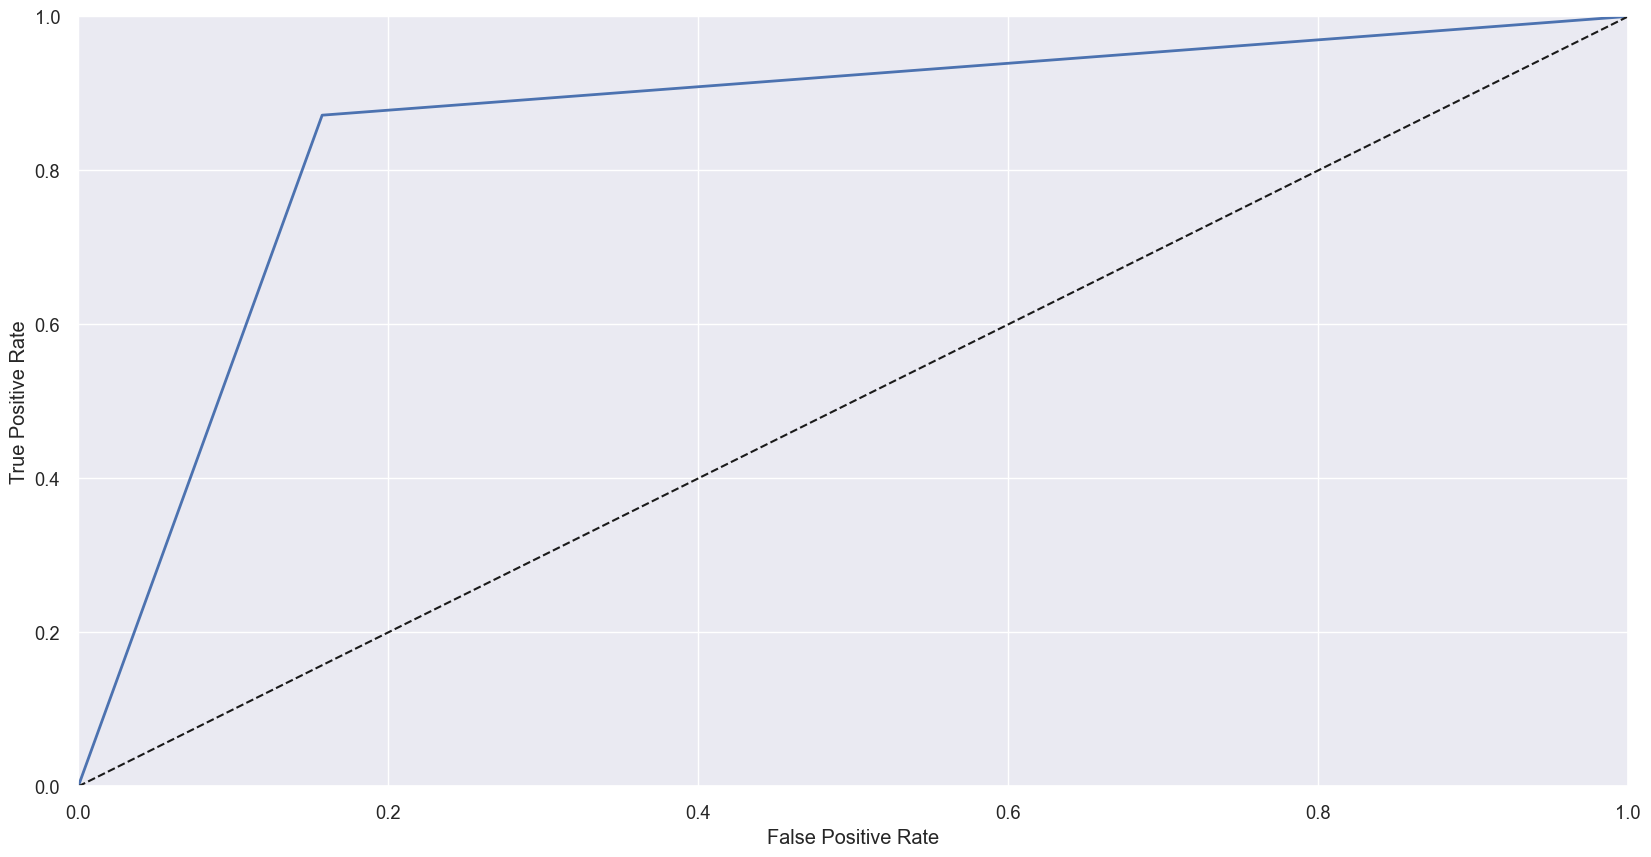

AUC: 0.8572


In [220]:
# Plot ROC curve and compute AUC score on train data
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plt.show()

auc_score = roc_auc_score(y_train, y_train_pred)
print(f'AUC: {round(auc_score, 4)}')

### Model performance on test data

<AxesSubplot:>

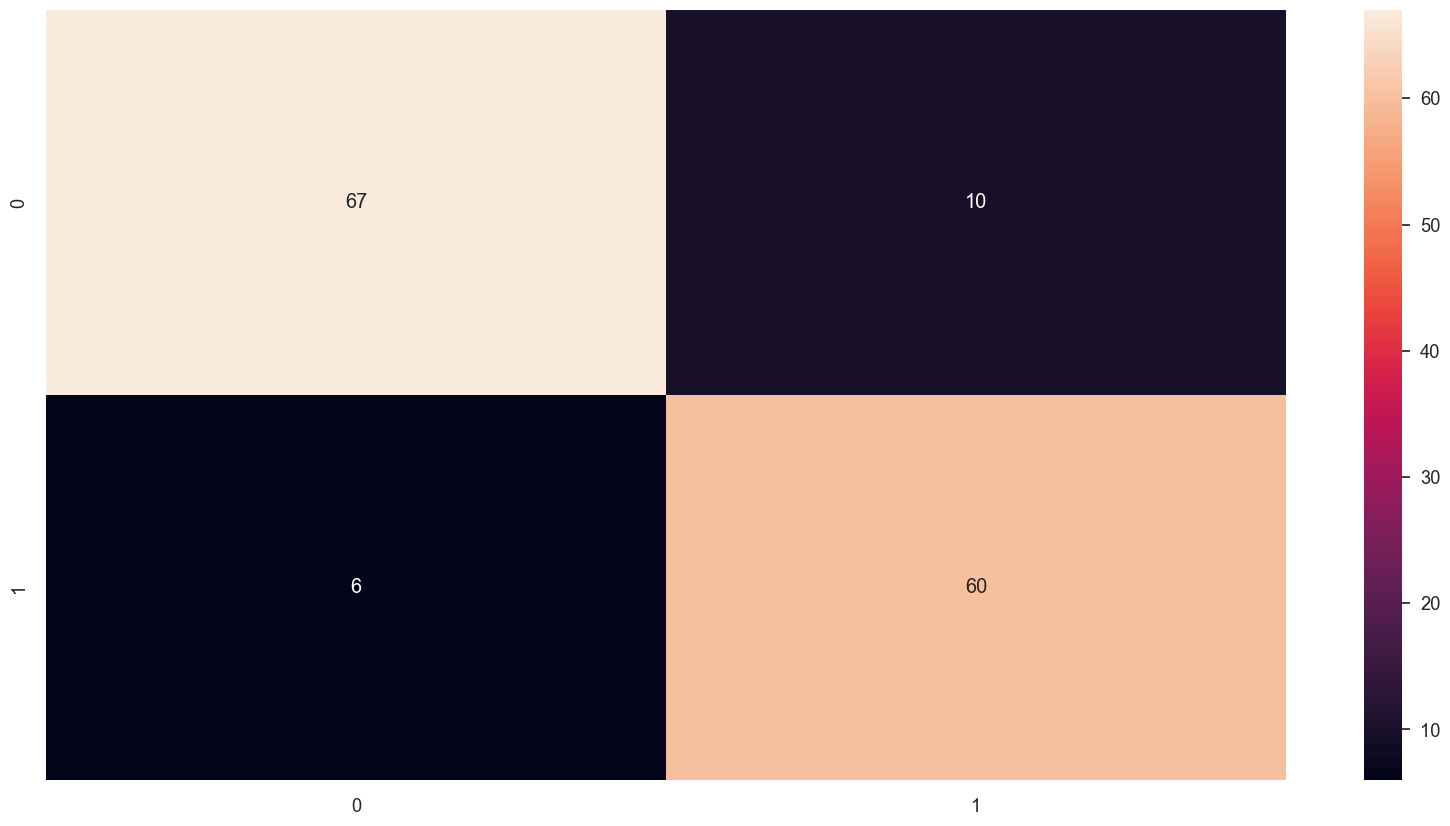

In [221]:
# Generate and display the confusion matrix
y_test_pred = cross_val_predict(best_svm_clf, X_test, y_test, cv=cv)
confusion_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

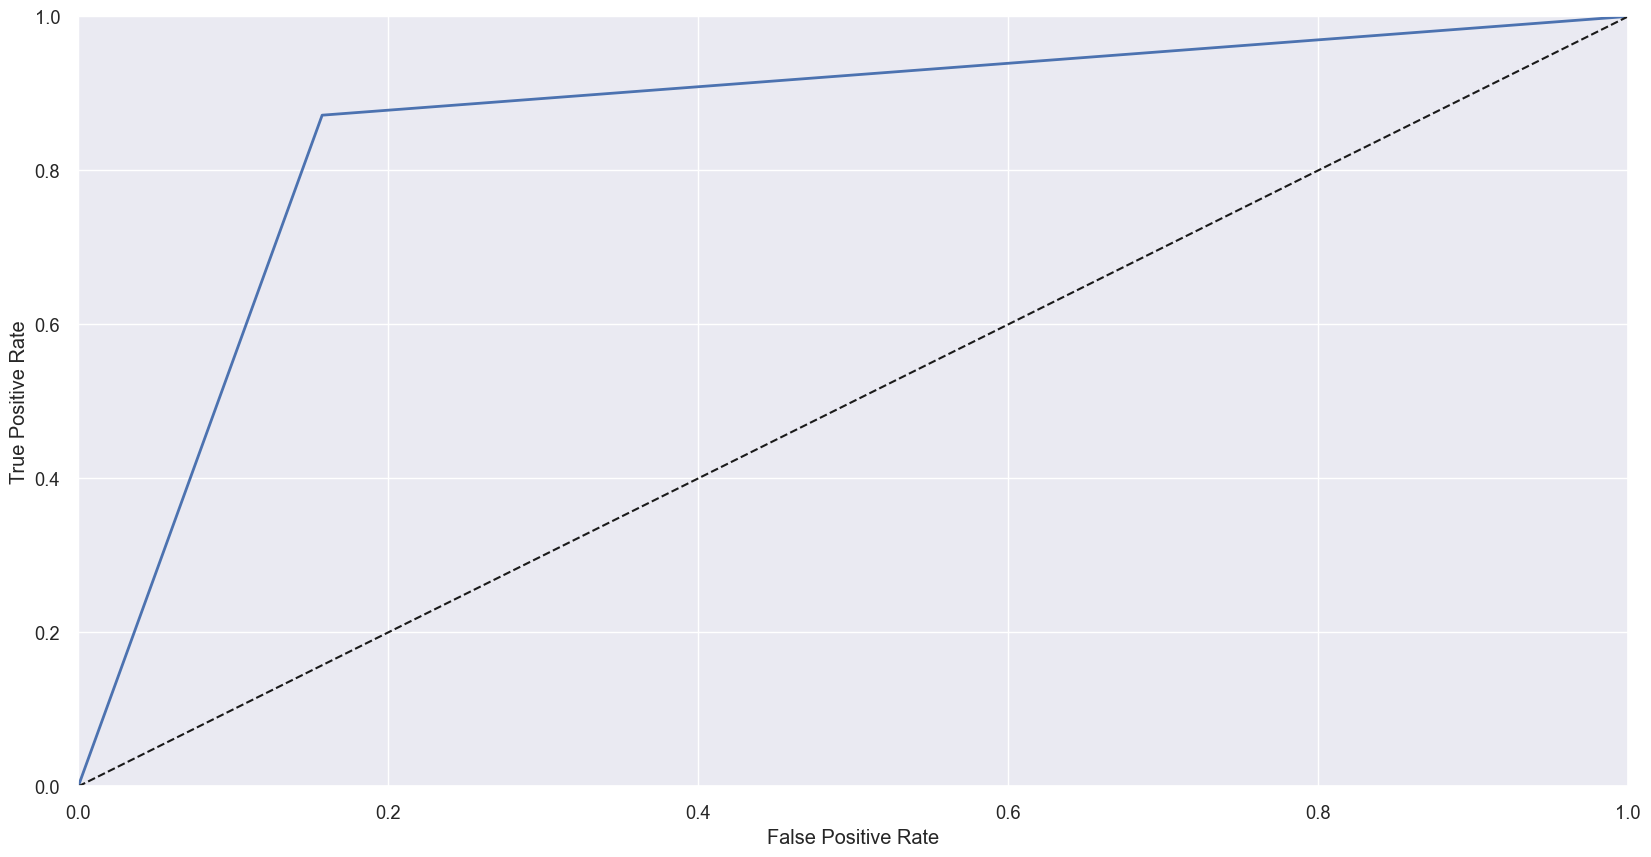

AUC score: 0.8572


In [222]:
# Plot ROC curve and compute AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plt.show()
auc = roc_auc_score(y_train, y_train_pred)
print(f'AUC score: {round(auc, 4)}')

### Model performance on Test data

<AxesSubplot:>

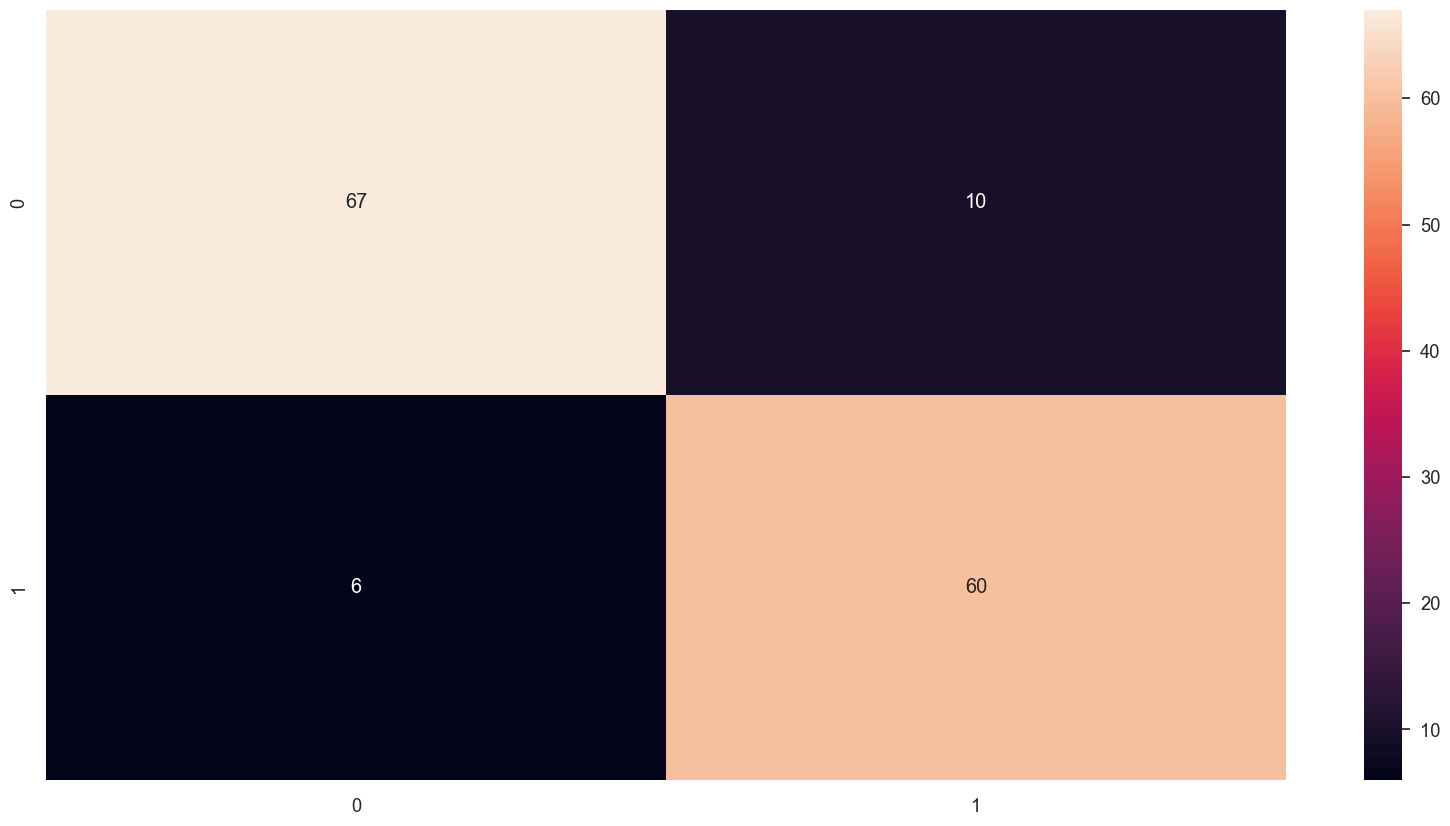

In [223]:
# Display the confusion matrix using a heatmap
y_test_pred = cross_val_predict(best_svm_clf, X_test, y_test, cv=cv)
confusion_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

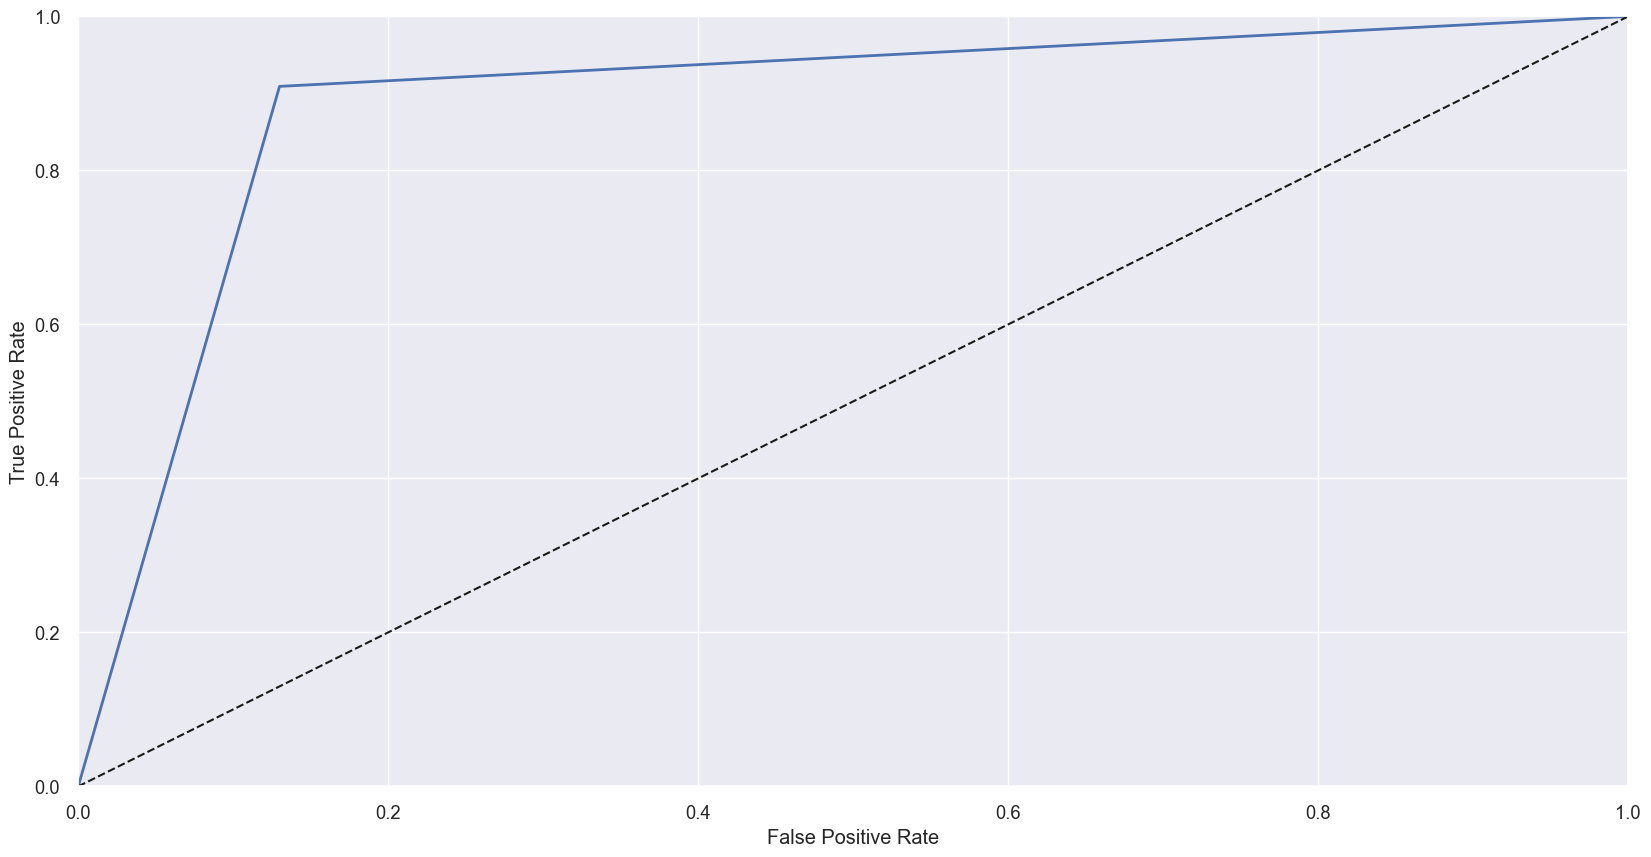

AUC: 0.8896


In [224]:
# Plot ROC curve and compute AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_svm, tpr_svm, "SVC")
plt.show()
auc = roc_auc_score(y_test, y_test_pred)
print(f'AUC: {round(auc,4)}')

In [225]:
# Display performance metric score for SVM classifier
svm_metrics = print_scores(y_test, y_test_pred)

Accuracy: 0.8881
Precision: 0.8571
Recall: 0.9091
F1-score: 0.8883


### 5. Random Forest Classifier

In [226]:
# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [650, 700, 750, 800],
    'criterion': ['gini', 'entropy'],
    'max_features': [n_features-9, n_features-8, n_features-5]
}

# initialize the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# create a grid search object with cross-validation and scoring metrics
grid_search = GridSearchCV(
    rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

# fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# extract the best estimator and its hyperparameters
best_rf_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", best_params)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters:  {'criterion': 'gini', 'max_features': 30, 'n_estimators': 650}
Best accuracy score:  0.8298245614035087


### Model Performance on Train Data

<AxesSubplot:>

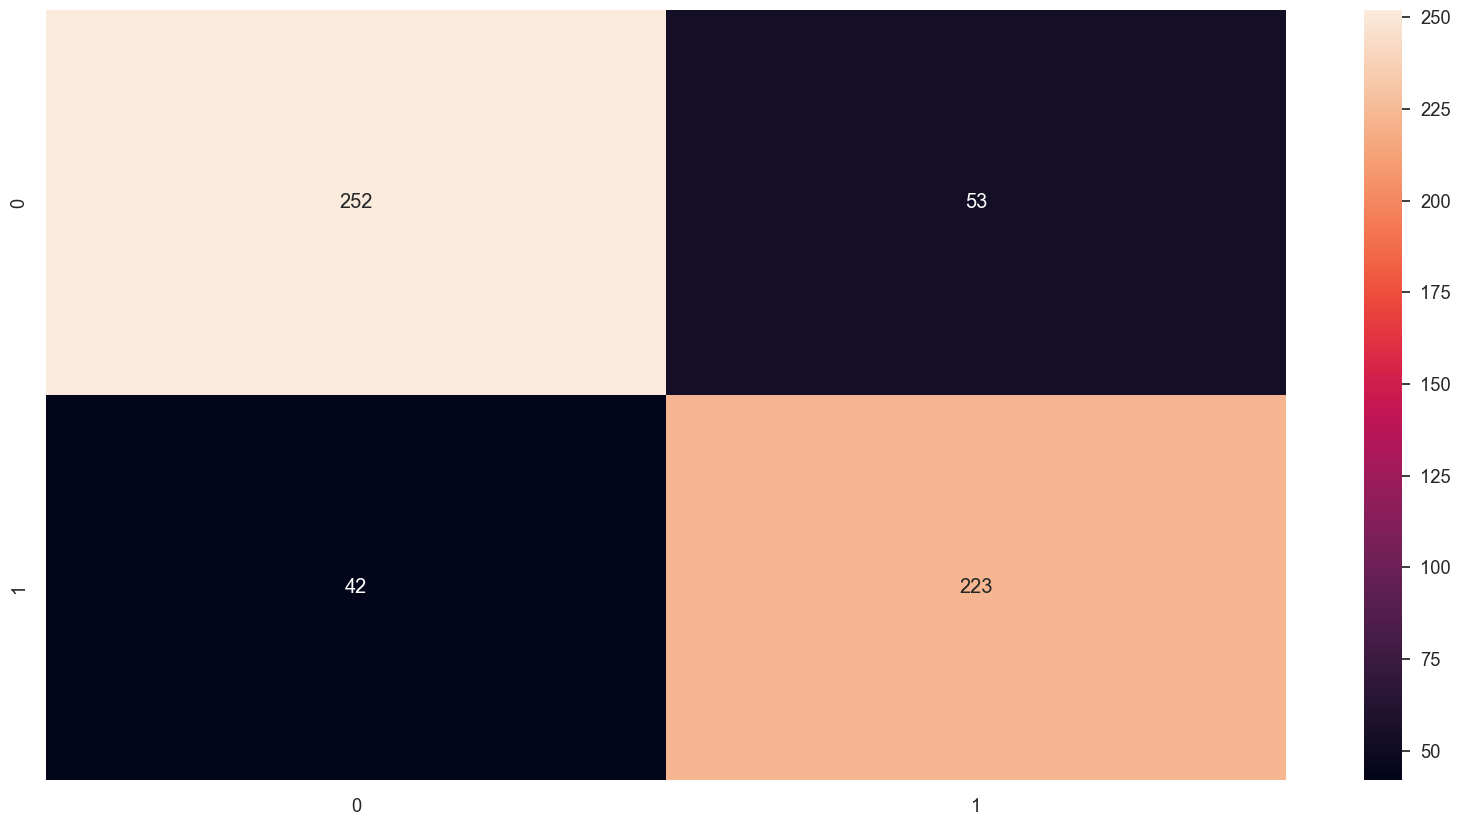

In [227]:
# Display the confusion matrix using a heatmap
y_train_pred = cross_val_predict(best_rf_clf, X_train, y_train, cv=cv)
confusion_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion_mx, annot=True, fmt='')

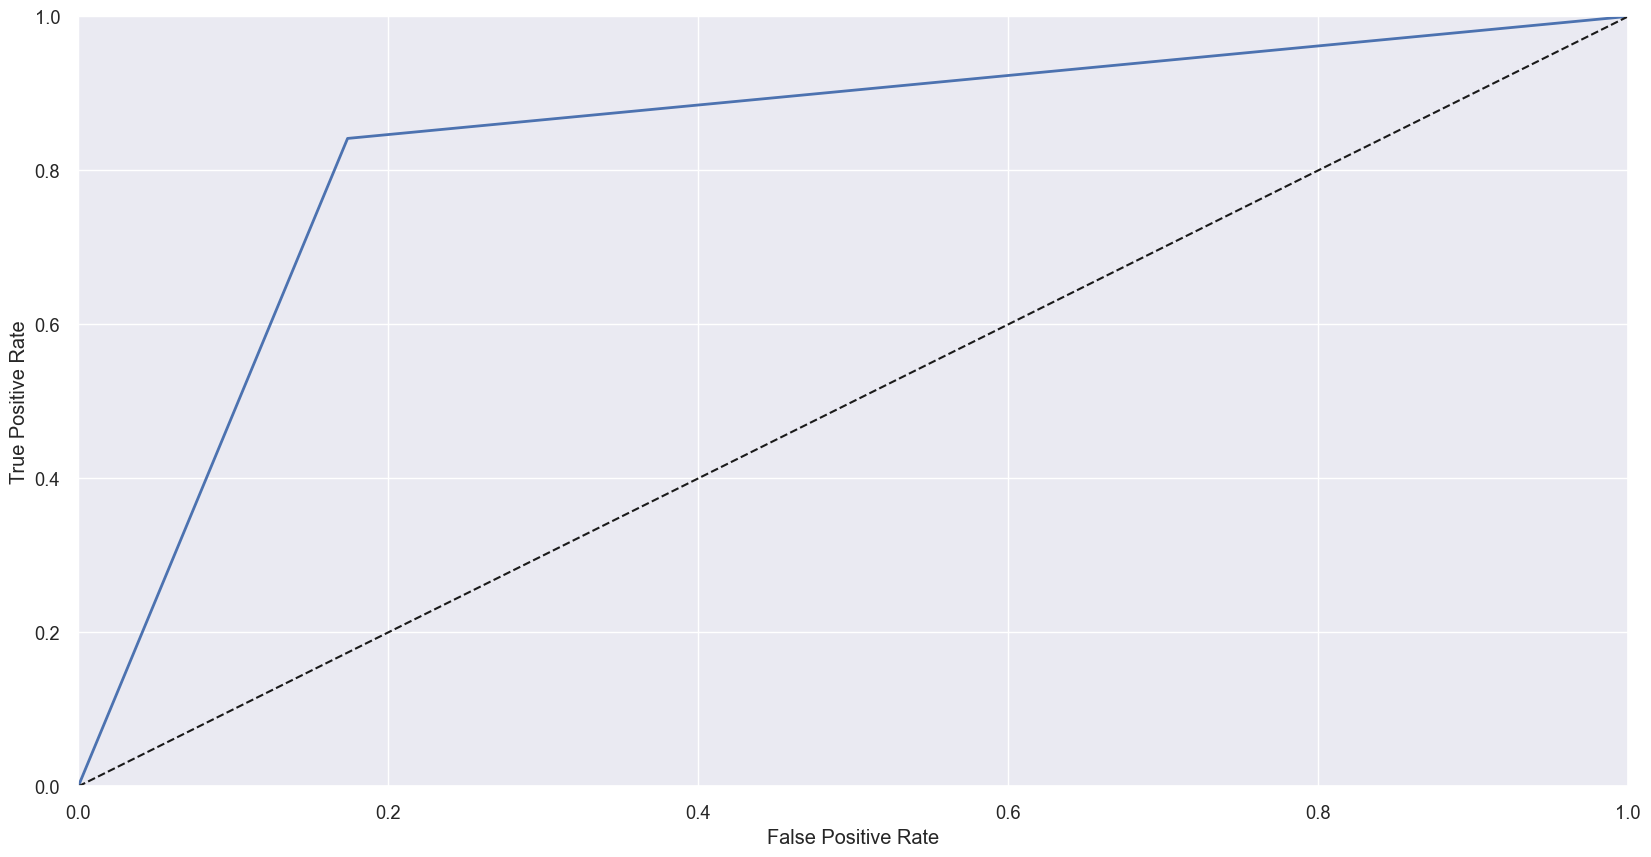

AUC score: 0.8339


In [228]:
# Plot ROC curve and compute AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_train_pred)
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.show()
auc = roc_auc_score(y_train, y_train_pred)
print(f'AUC score: {round(auc, 4)}')

### Model Performance on Test Data

<AxesSubplot:>

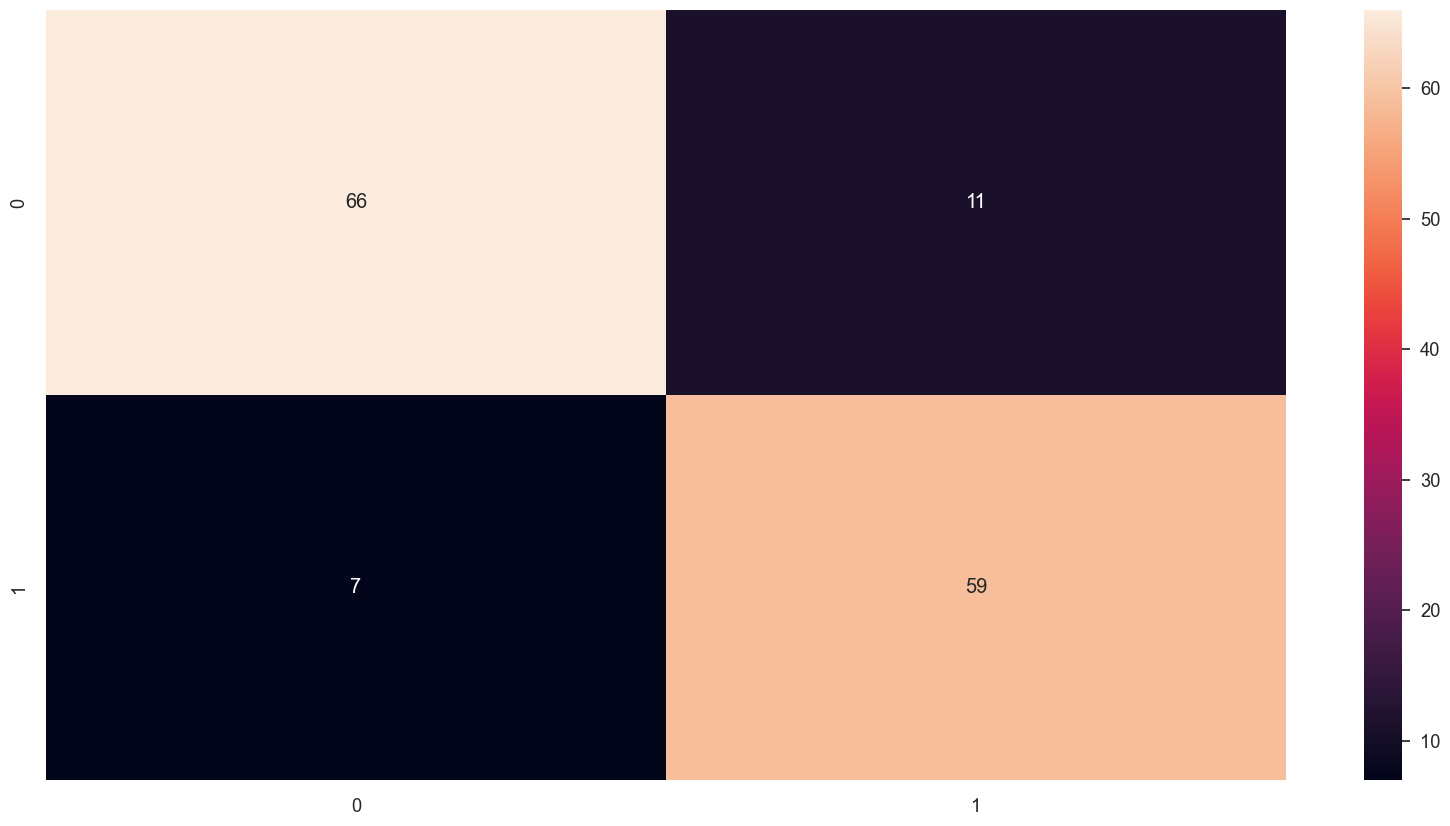

In [229]:
# Display the confusion matrix using a heatmap
y_test_pred = cross_val_predict(best_rf_clf, X_test, y_test, cv=cv)
conf_mx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mx, annot=True, fmt='')

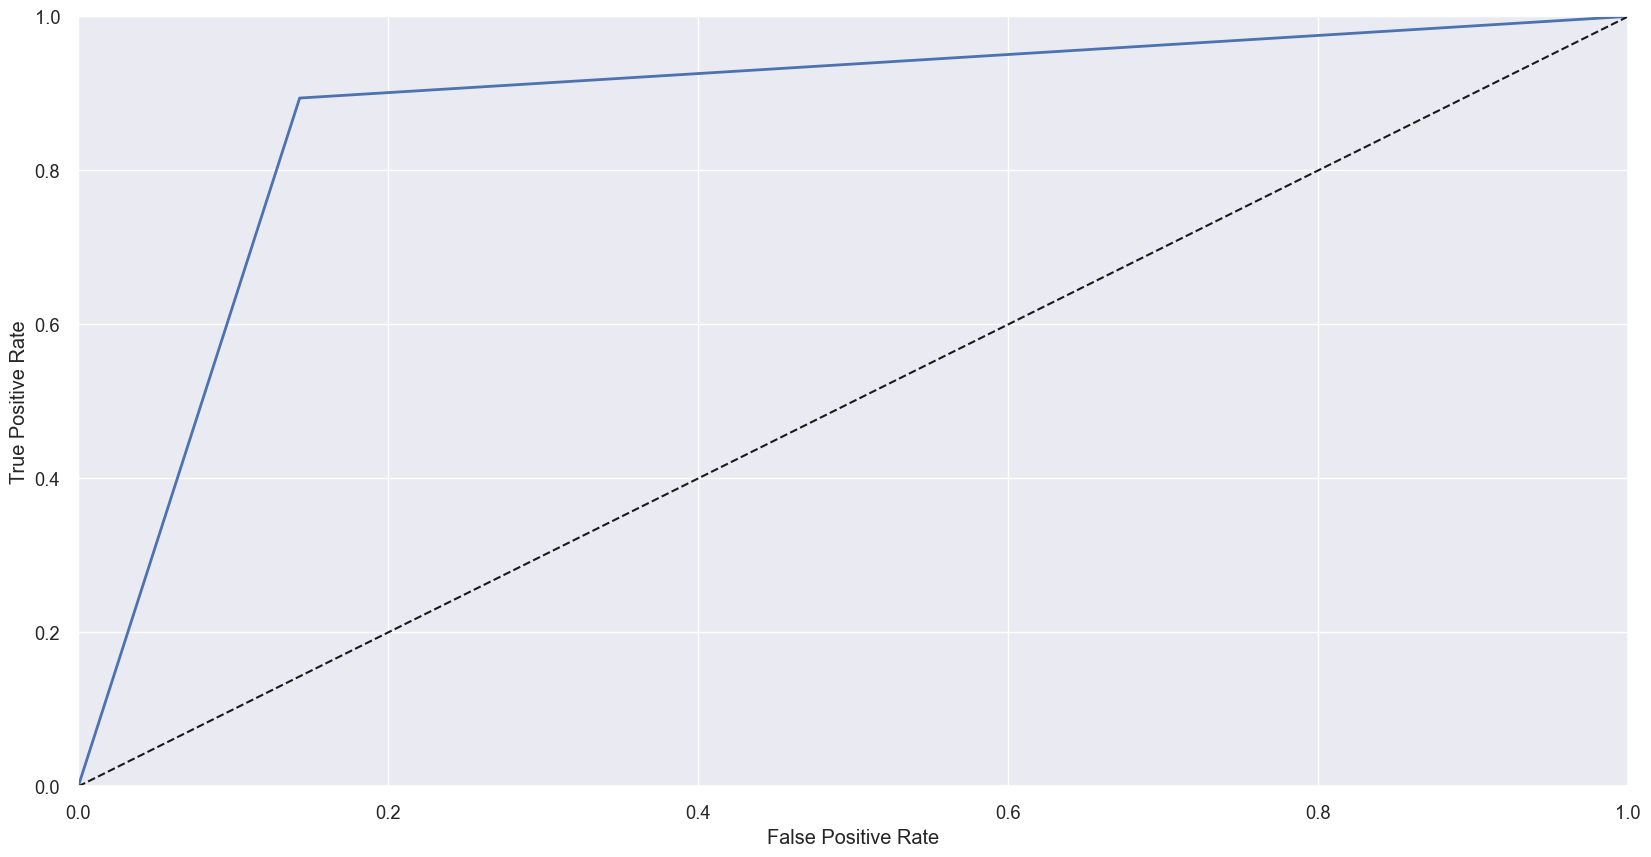

AUC score: 0.8755


In [230]:
# Plot ROC curve and compute AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred)
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.show()
auc = roc_auc_score(y_test, y_test_pred)
print(f'AUC score: {round(auc, 4)}')

In [231]:
# Display performance metric score for Random Forest classifier
rf_metrics = print_scores(y_test, y_test_pred)

Accuracy: 0.8741
Precision: 0.8429
Recall: 0.8939
F1-score: 0.8743


In [232]:
# create a numpy array to store the scores
scores_array = np.array([
    list(lr_metrics.values()),
    list(dt_metrics.values()),
    list(knn_metrics.values()),
    list(svm_metrics.values()),
    list(rf_metrics.values())
])

# create a pandas dataframe from the numpy array
scores_df = pd.DataFrame(scores_array.T, columns=["Logistic Regression","Decision Trees", "K-Nearest Neighbors", "C-Support Vector Machine", "Random Forest"], index=list(knn_metrics.keys()))

# highlight the maximum value in each row with a green color
highlighted_df = scores_df.style.highlight_max(axis=1, color='lightgreen').set_properties(**{'border': '1px solid black', 'font-size': '12px'})

# display the dataframe
display(highlighted_df)

,Logistic Regression,Decision Trees,K-Nearest Neighbors,C-Support Vector Machine,Random Forest
accuracy,0.888112,0.895105,0.909091,0.888112,0.874126
precision,0.867647,0.849315,0.907692,0.857143,0.842857
recall,0.893939,0.939394,0.893939,0.909091,0.893939
f1-score,0.888211,0.895249,0.909037,0.888265,0.874299


#### Conclusion
1. K-Nearest Neighbors algorithm had the highest accuracy, precision, recall, and f1-score.
2. Decision Tree algorithm had better recall and closely followed K-Nearest Neighbors.
3. Random Forest algorithm had slightly lower performance in terms of evaluation metrics
4. Further analysis needed to determine the best algorithm for specific task, considering factors such as computational efficiency and interpretability.